# Linear Regression

## contents
### 1. Problem formulation and expected result
### 2. Preparation
#### 2.1. Load packages and settings
#### 2.2. Load data
### 3. Data inspection
#### 3.1. Basic data inspect
#### 3.2. Check null values and fix them
#### 3.3. Inspect numerical variables v.s. price
#### 3.4. Inspect categorical variables v.s. price
#### 3.5. Inspect distributions and outliers
### 4. Data processing
#### 4.1. Convert categorical variables to numerical representation
#### 4.2. Check important variables by correlation
#### 4.3. Feature importance
#### 4.4. splitting the data
### 5. Build linear regression model
#### 5.1. Define, fit, predict
#### 5.2. Validate 
#### 5.3. Improve model by parametertuning
##### 5.3.1. Use only the variables with the top 10 feature importance
##### 5.3.2. Use variables that went through recursive feature elimination
##### 5.3.3. Use variables that went through recursive feature elimination with support vector regressor
#### 5.4. Improve results by other model
##### 5.4.1. Random forest model
##### 5.4.2. XG Boost 
##### 5.4.3. Neural network regressor - MLPRegressor
#### 5.5. Update the model using the best method




## 1. Problem formulation and expected result
### based on the data: https://www.kaggle.com/datasets/shaistashaikh/carprice-assignment, 
### a. what are the factors that affect the car prices?
### b. predict car prices.

## 2. Preparation
### 2.1.  Load packages and settings

In [6]:
#load packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [7]:
#set the plot size
sns.set(rc = {'figure.figsize':(12,10)})

In [8]:
#see all columns
pd.set_option('display.max_columns', None)

In [9]:
#change scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [10]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.1. Load data

In [11]:
raw_data = pd.read_csv('/Users/juli/Desktop/ML/CarPrice_Assignment.csv')

## 3. Data inspection
### 3.1. Basic data inspect

In [12]:
#check the first 5 rows
raw_data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [13]:
#check the amount of rows and columns
raw_data.shape

(205, 26)

In [14]:
#check the unique values in each column
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('unique values of {}: {}, {}'.format(column, nr_values, unique_vals))
    else:
        print('unique values of {}: {}'.format(column, nr_values))

unique values of car_ID: 205
unique values of symboling: 6, [-2 -1  0  1  2  3]
unique values of CarName: 147
unique values of fueltype: 2, ['diesel' 'gas']
unique values of aspiration: 2, ['std' 'turbo']
unique values of doornumber: 2, ['four' 'two']
unique values of carbody: 5, ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
unique values of drivewheel: 3, ['4wd' 'fwd' 'rwd']
unique values of enginelocation: 2, ['front' 'rear']
unique values of wheelbase: 53
unique values of carlength: 75
unique values of carwidth: 44
unique values of carheight: 49
unique values of curbweight: 171
unique values of enginetype: 7, ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
unique values of cylindernumber: 7, ['eight' 'five' 'four' 'six' 'three' 'twelve' 'two']
unique values of enginesize: 44
unique values of fuelsystem: 8, ['1bbl' '2bbl' '4bbl' 'idi' 'mfi' 'mpfi' 'spdi' 'spfi']
unique values of boreratio: 38
unique values of stroke: 37
unique values of compressionratio: 32
unique values of 

### 3.2. Check null values and fix them

In [15]:
#check null values
raw_data.isnull().sum()
#there is no null value to fix

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### 3.3. inspect numerical variables v.s price

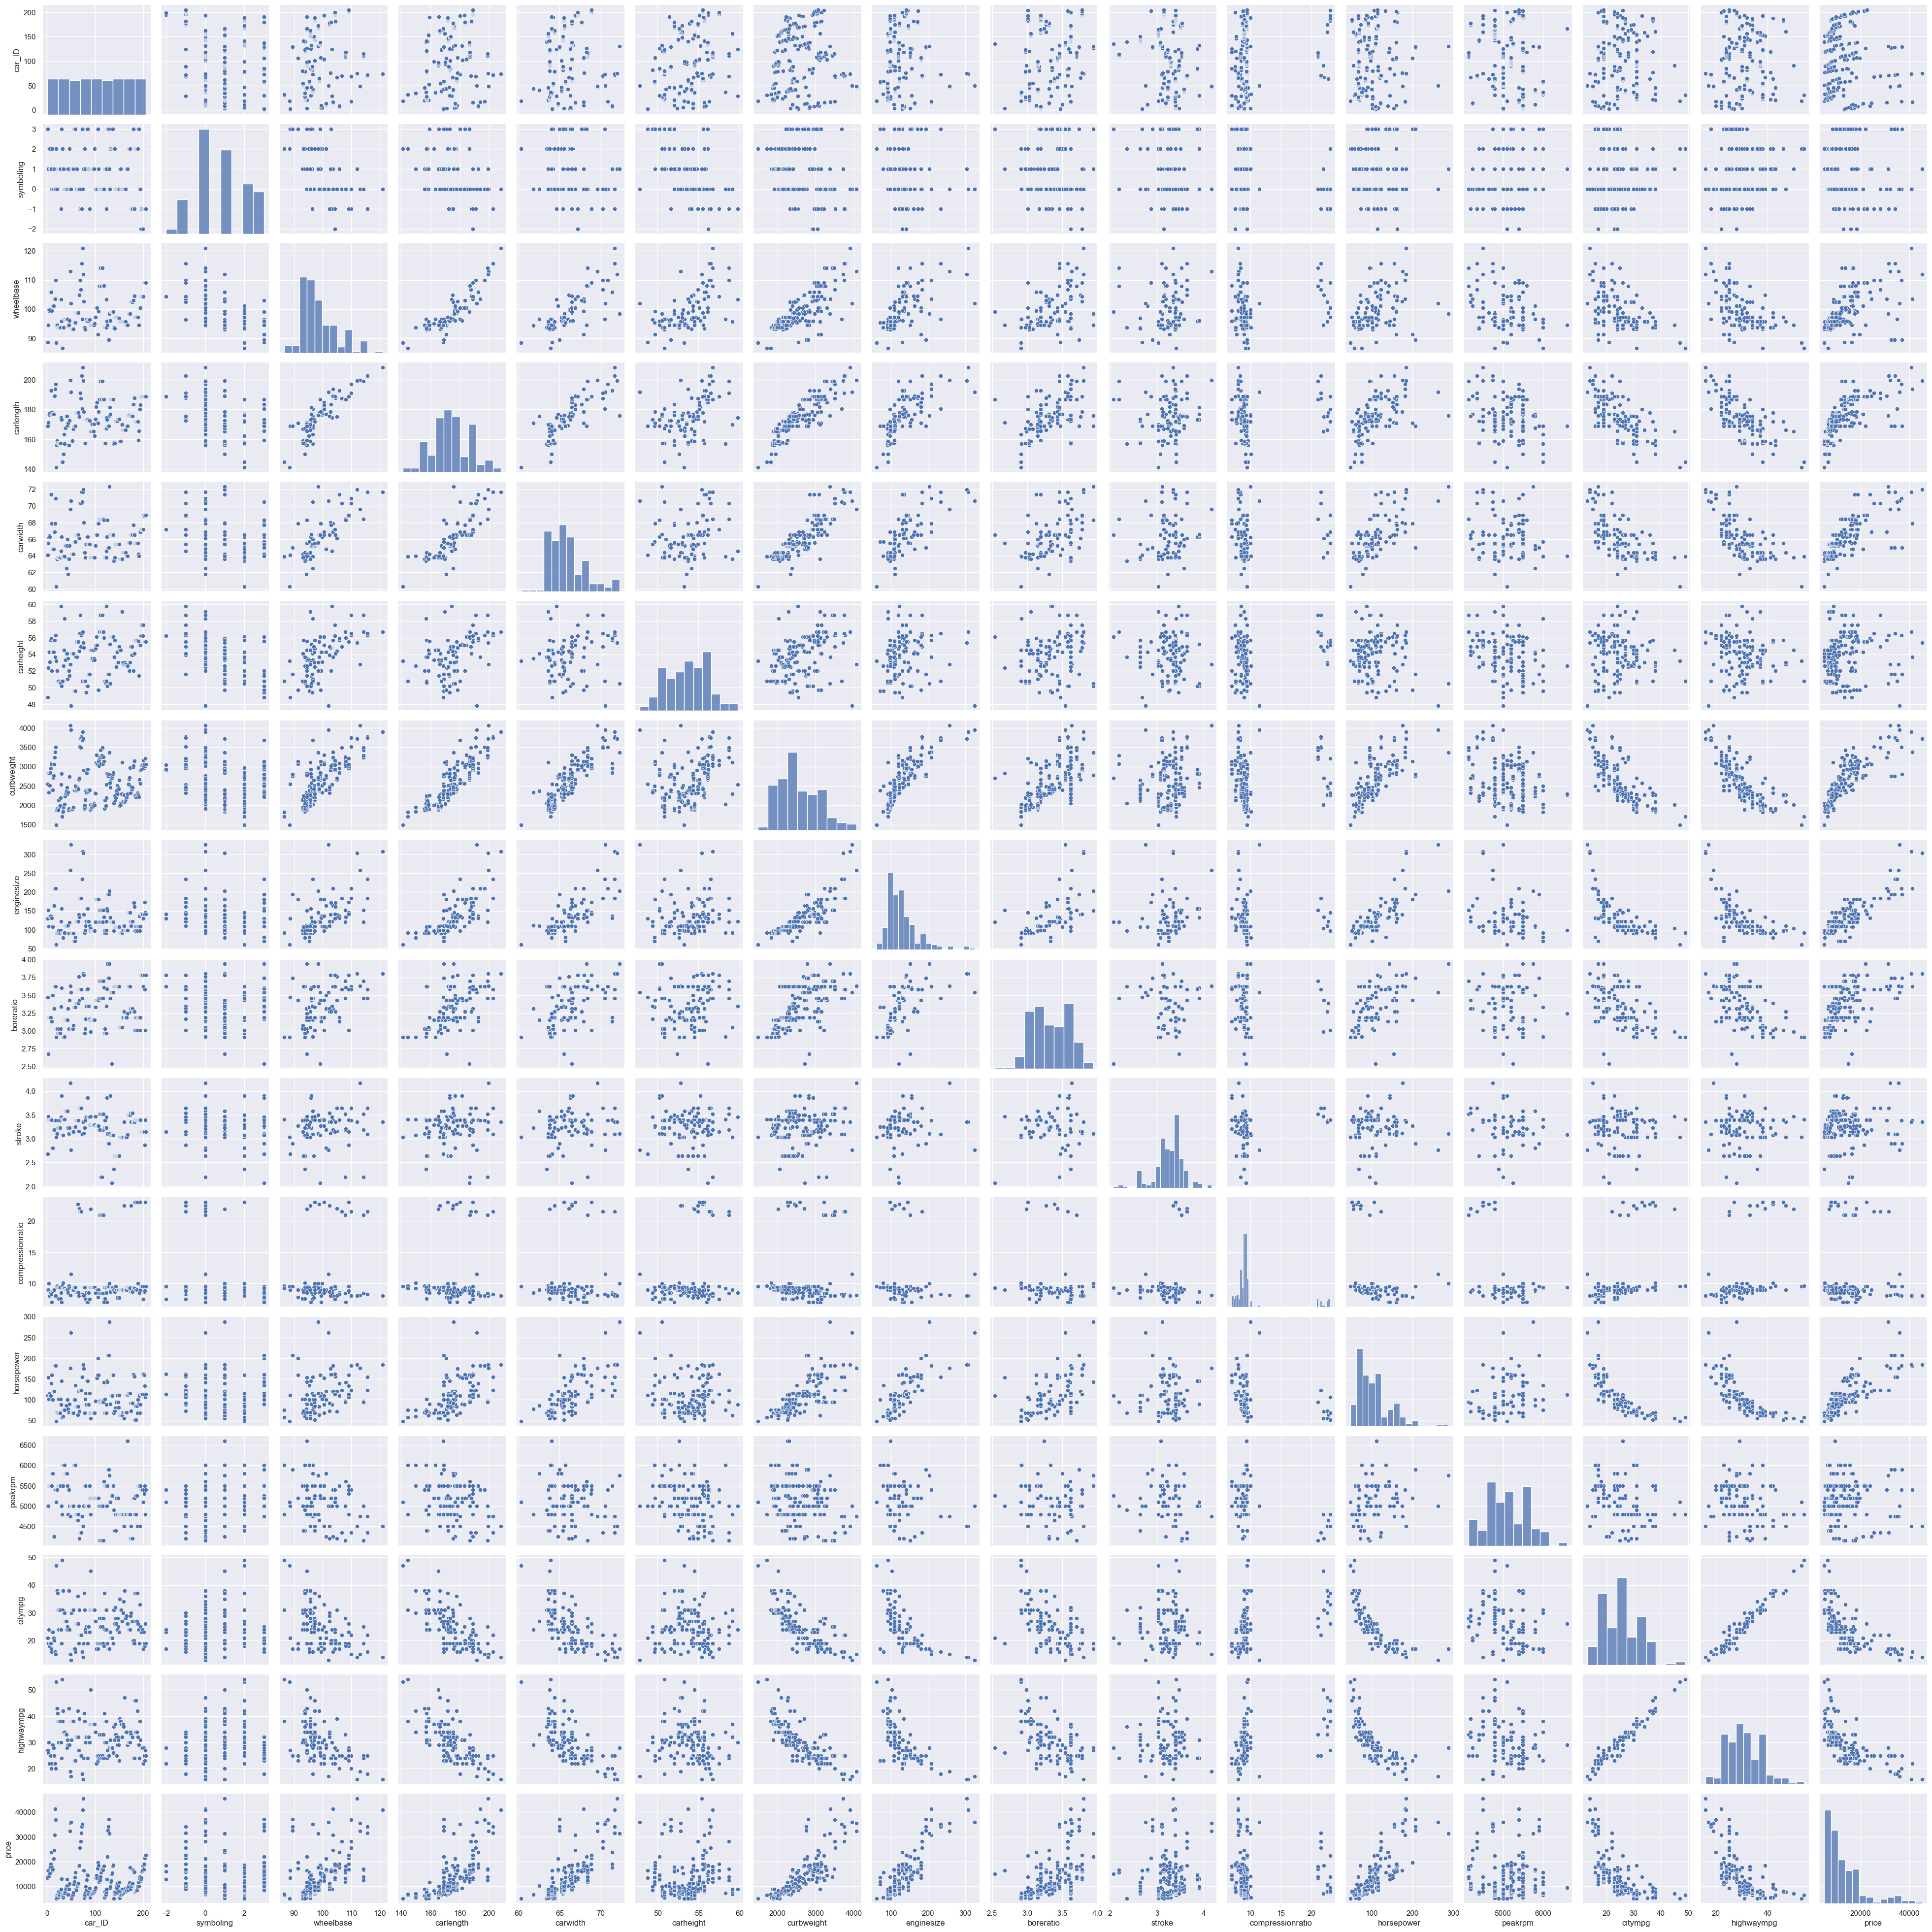

In [16]:
#visualize all data first to check which variables are more correlated to car prices
g = sns.pairplot(raw_data)

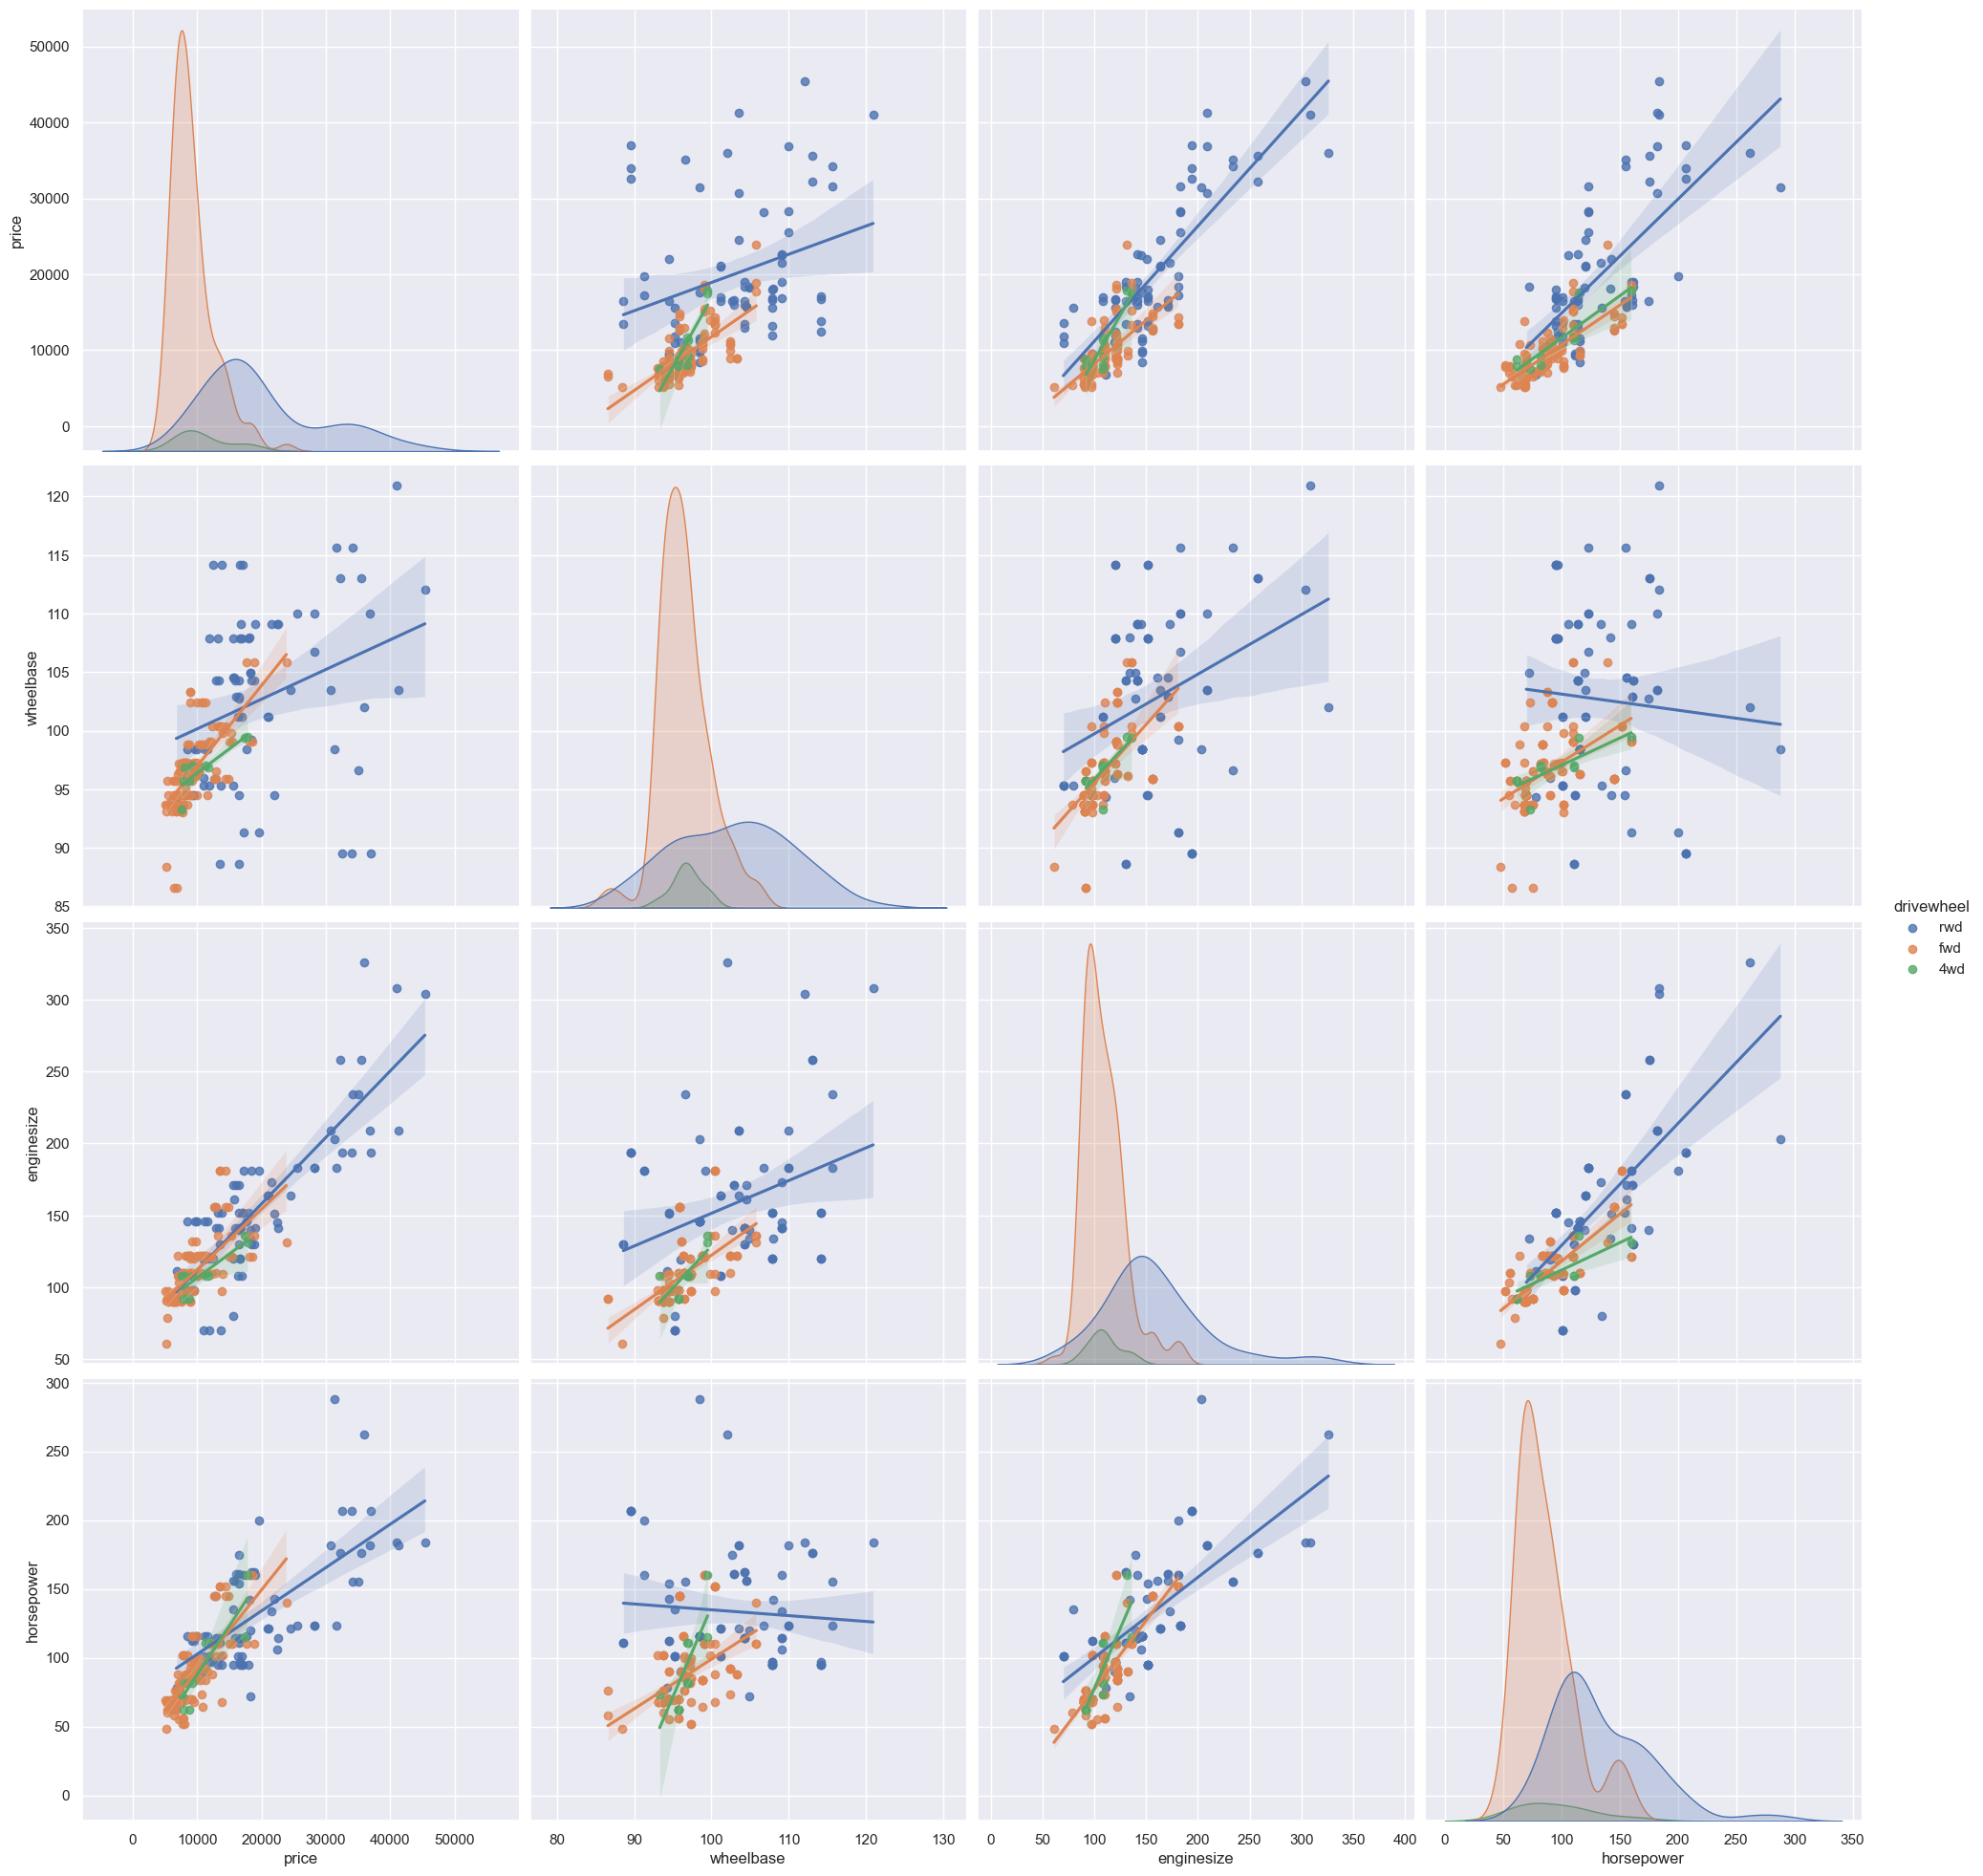

In [17]:
#pick out the variables that are more correlated to price and visualize their relationships to price
g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize', 'horsepower', 'drivewheel']], hue = 'drivewheel', height = 5, kind = 'reg')

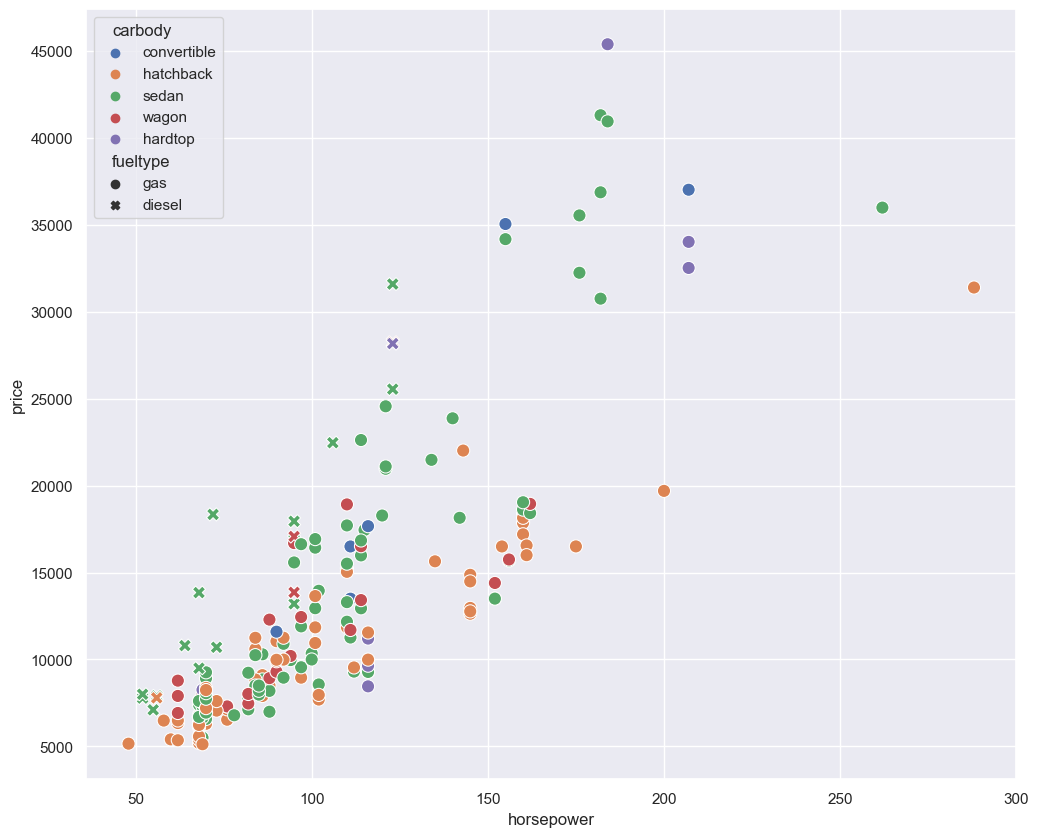

In [18]:
#investigate the individual variables that are more correlated to price further
#horsepower v.s. price
ax = sns.scatterplot(x = 'horsepower', y = 'price', data = raw_data, hue = 'carbody', style = 'fueltype', s = 90)

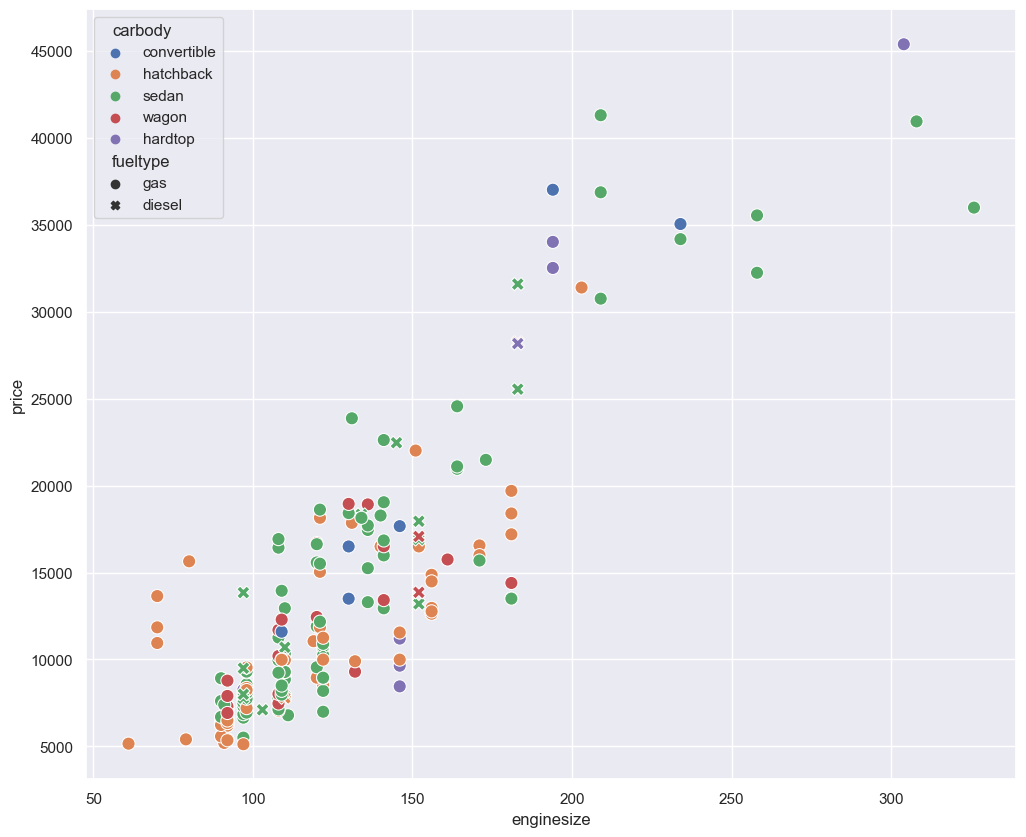

In [19]:
#enginesize v.s. price
ax = sns.scatterplot(x = 'enginesize', y = 'price', data = raw_data, hue = 'carbody', style = 'fueltype', s = 90)

### 3.4. inspect categorical variables v.s. price

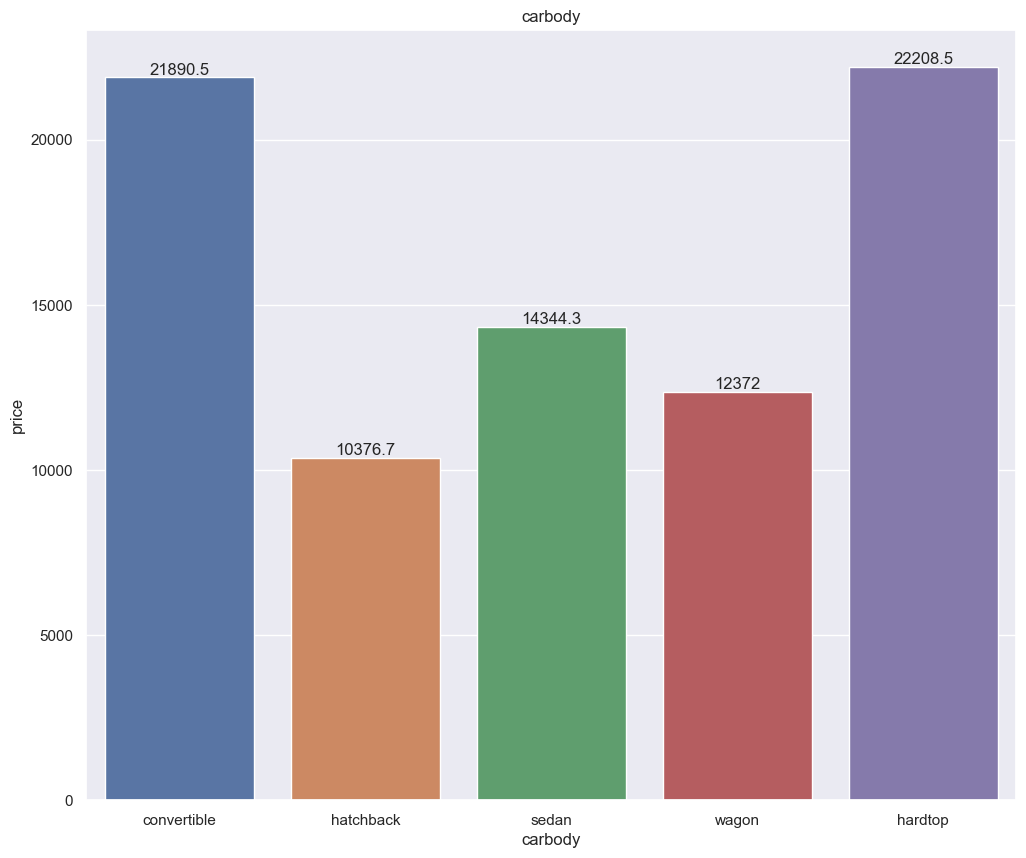

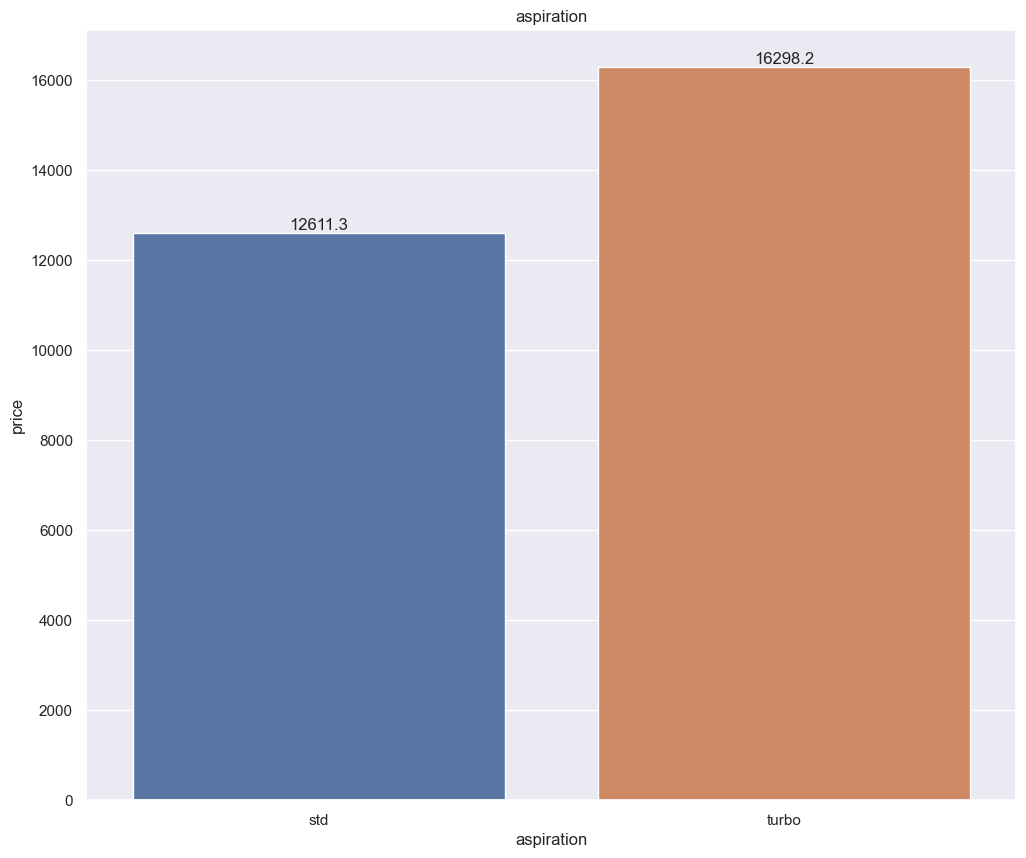

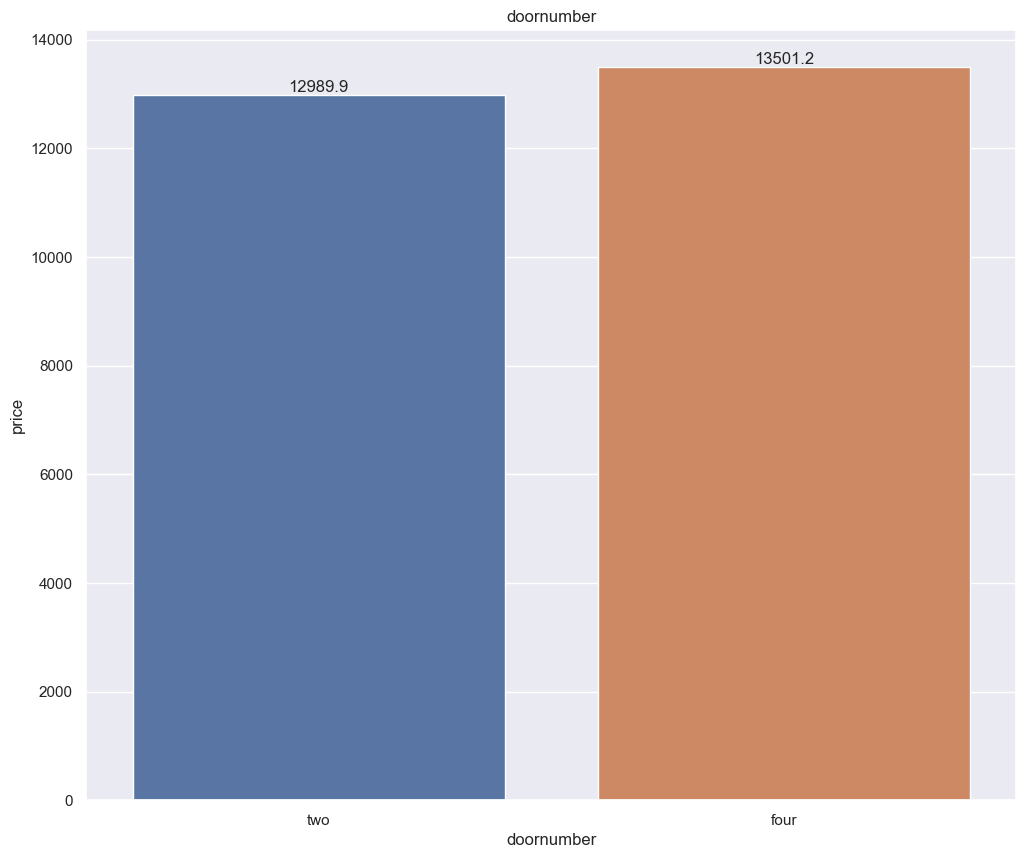

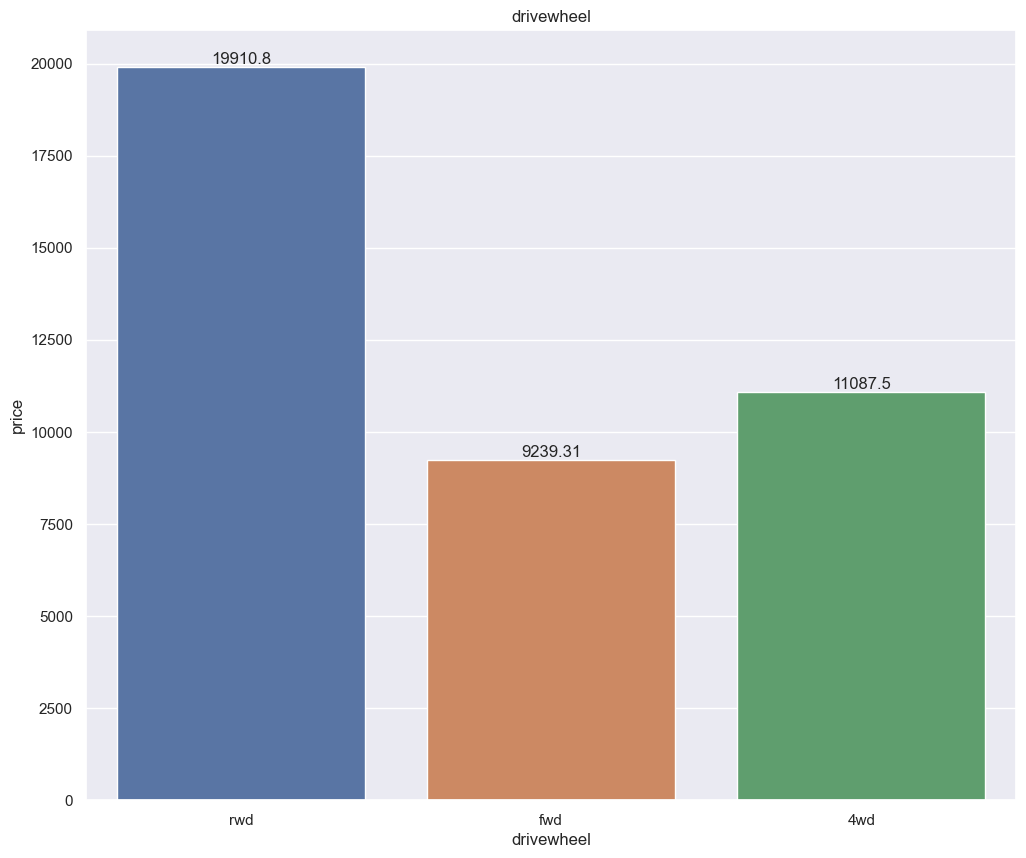

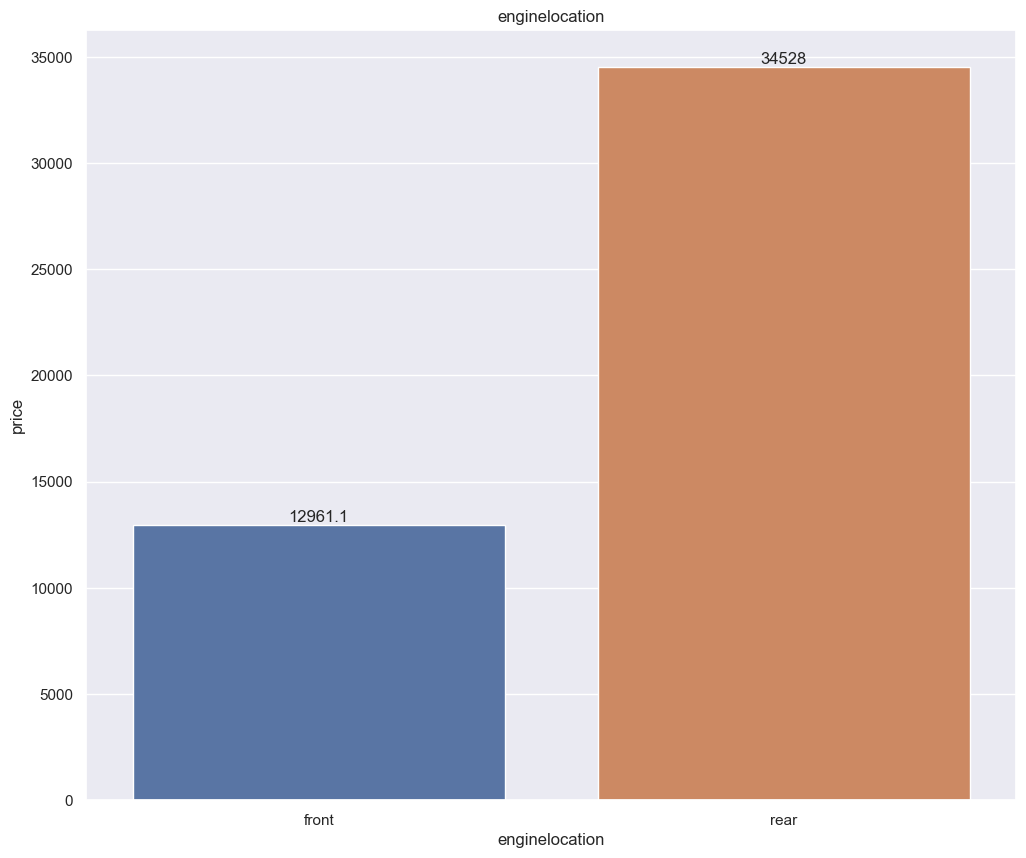

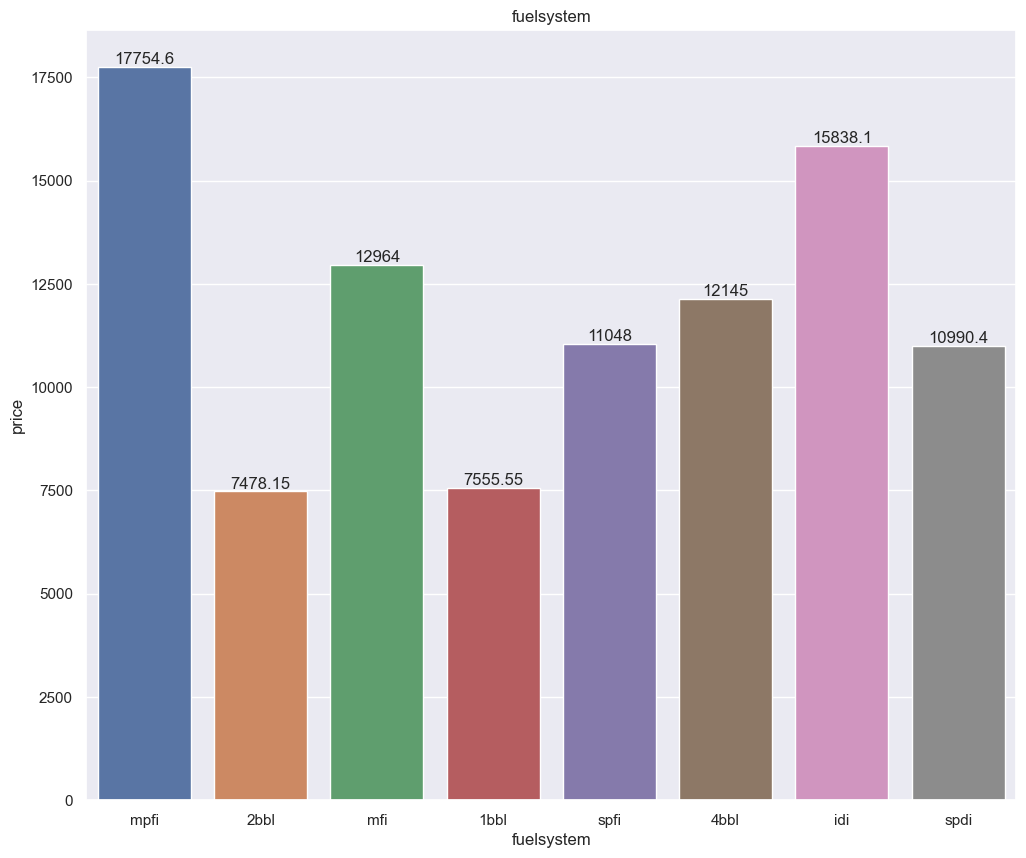

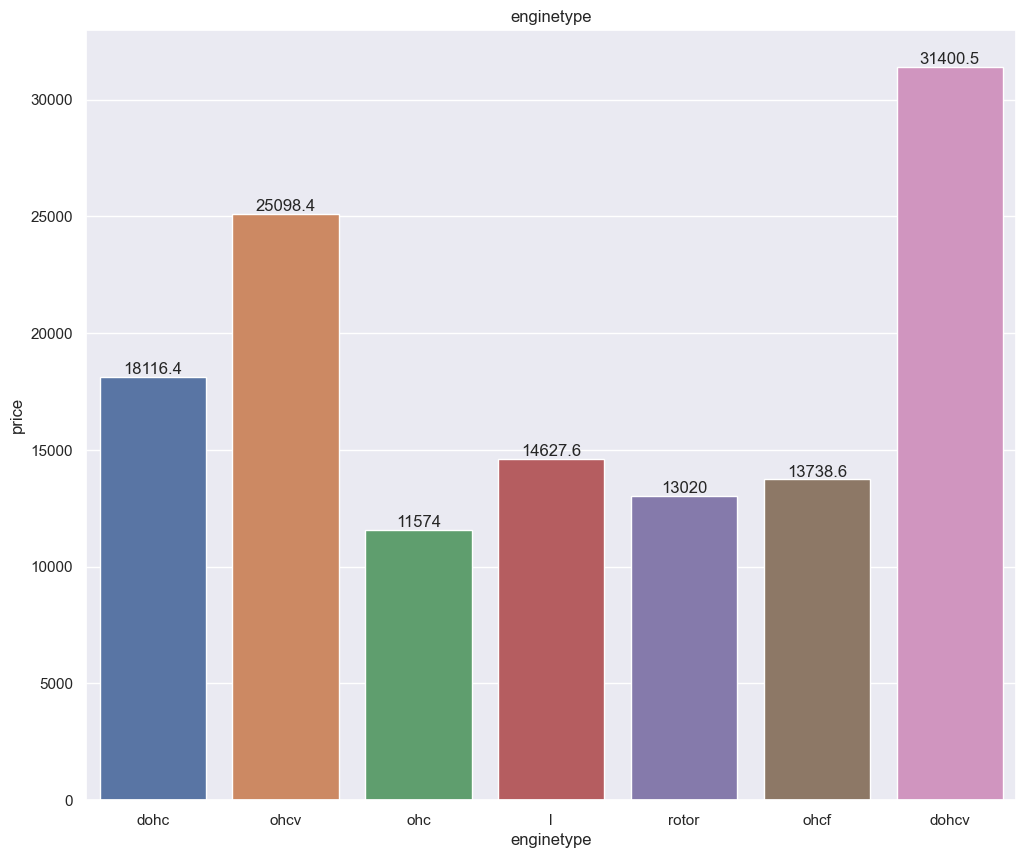

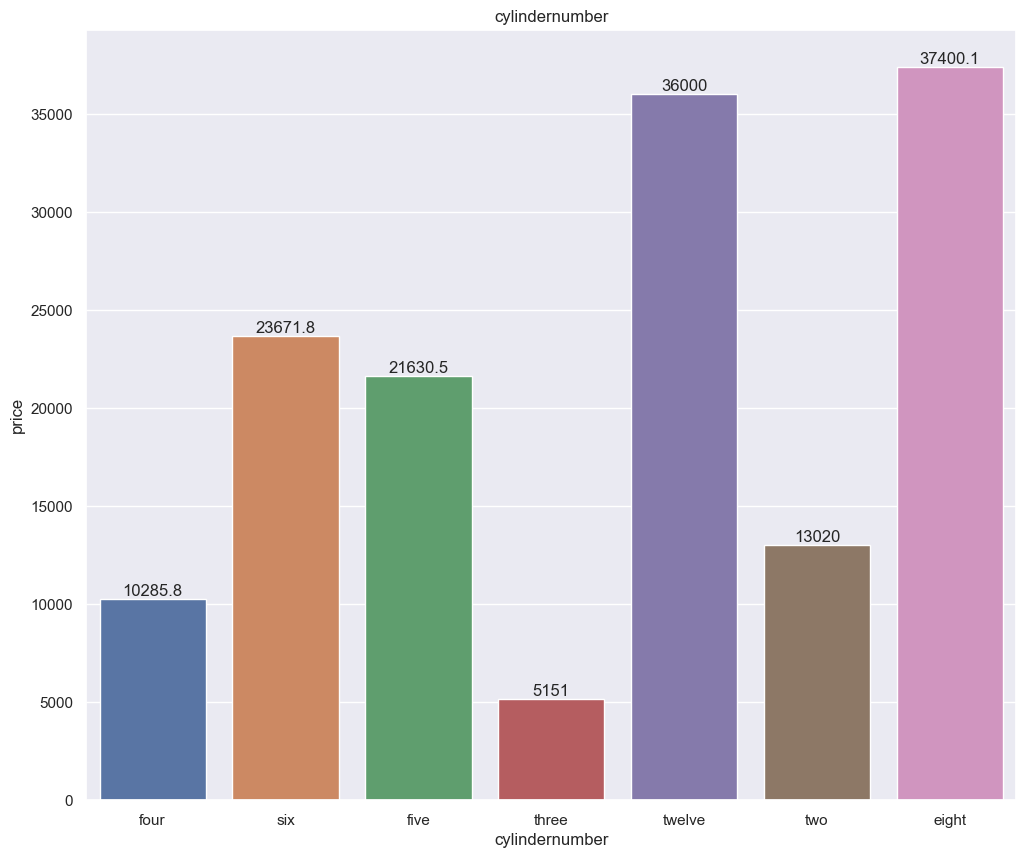

In [20]:
#average price by each categorical data
categories = ['carbody', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber']

for c in categories:
    ax = sns.barplot(x = c, y = 'price', data = raw_data, errorbar=('ci', False))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

### 3.5. inspect distributions and outliers

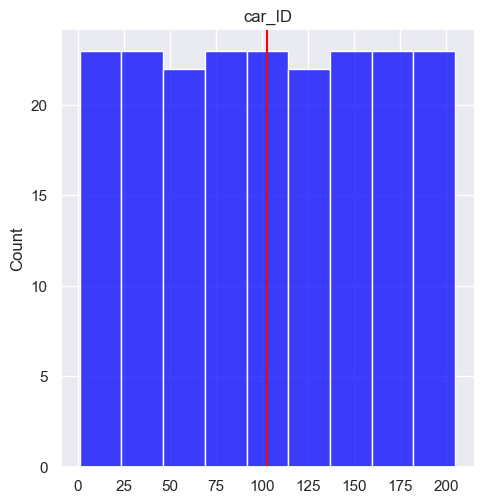

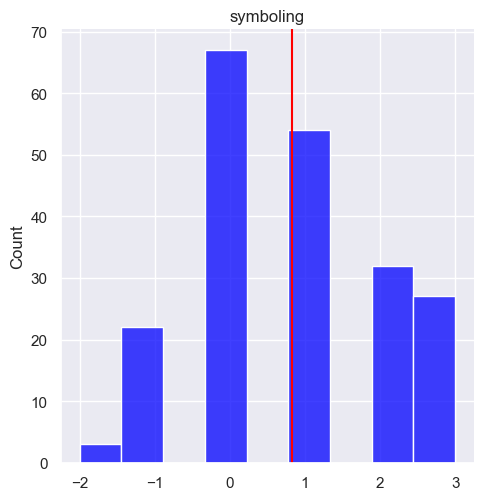

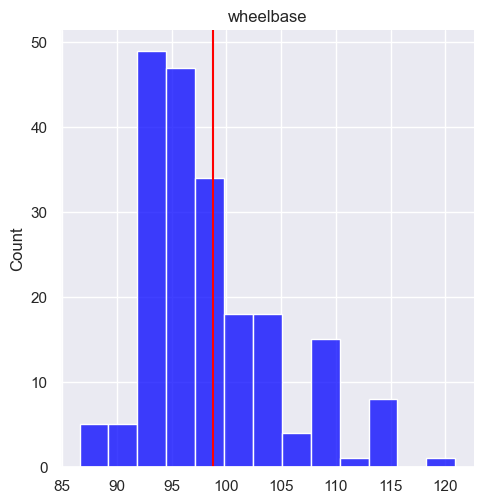

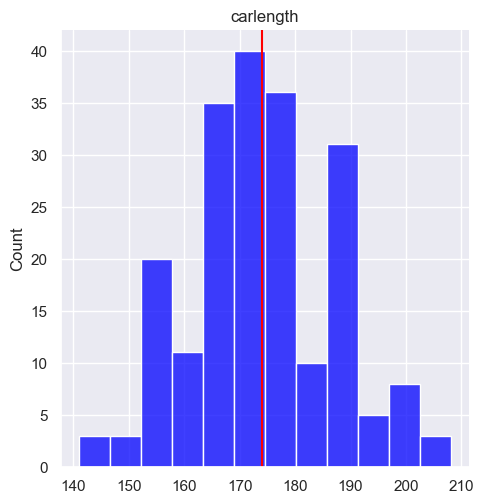

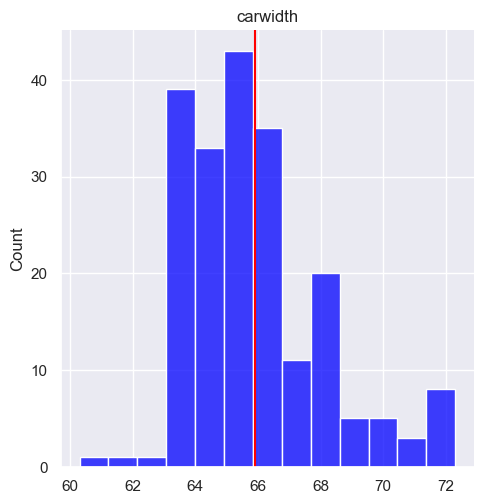

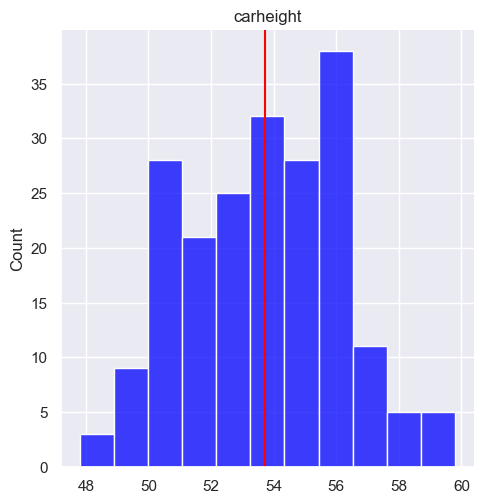

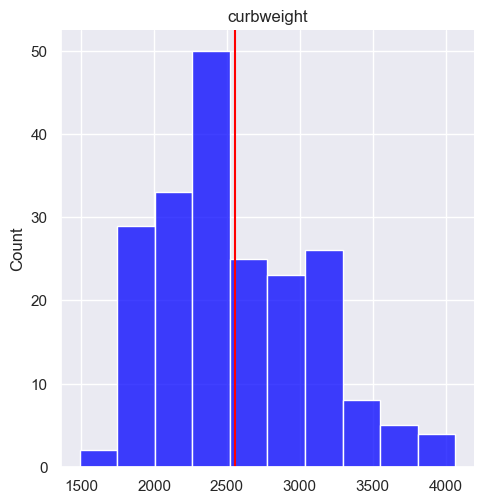

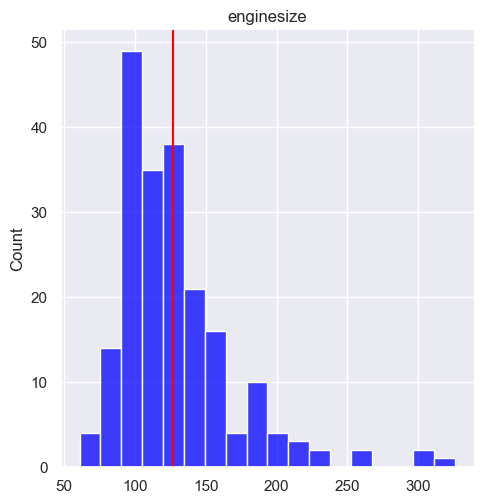

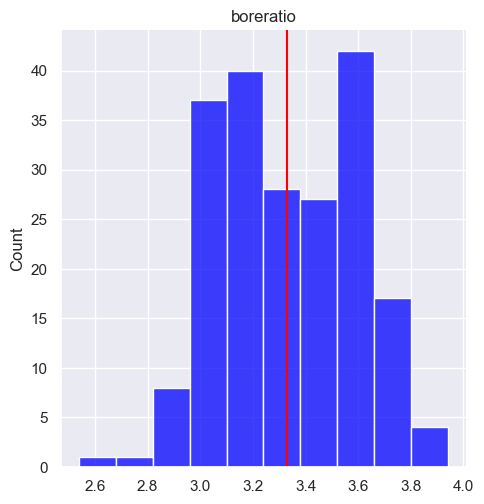

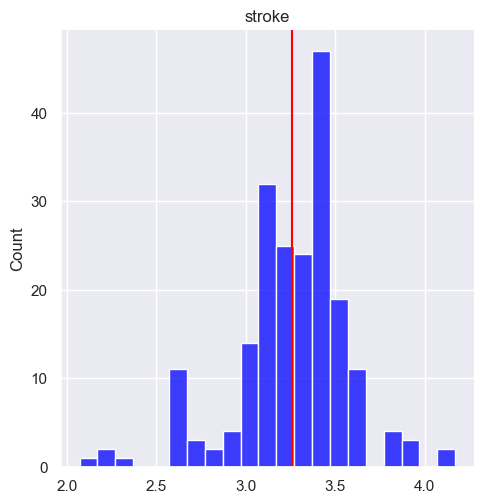

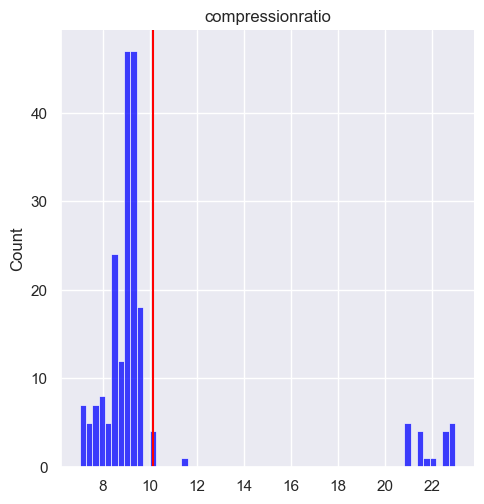

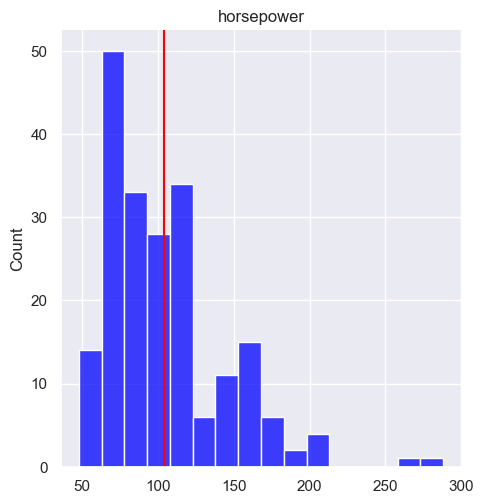

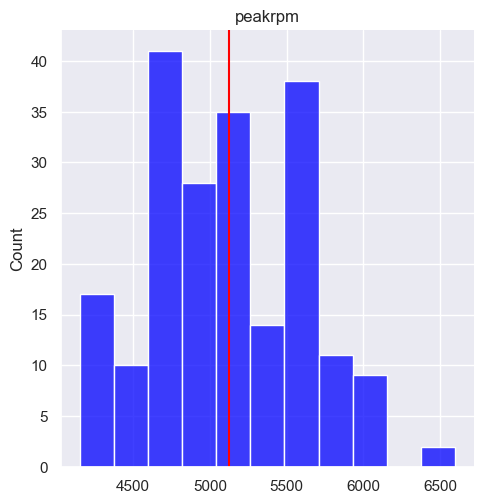

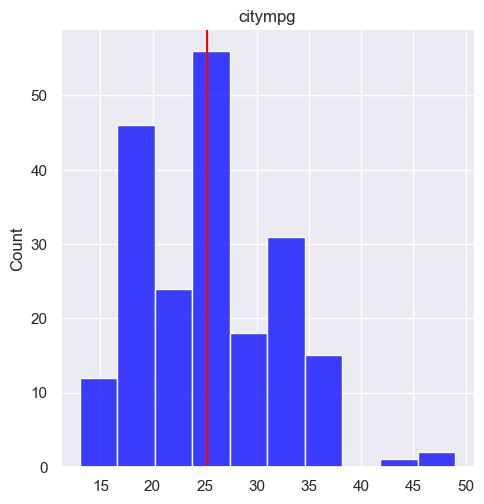

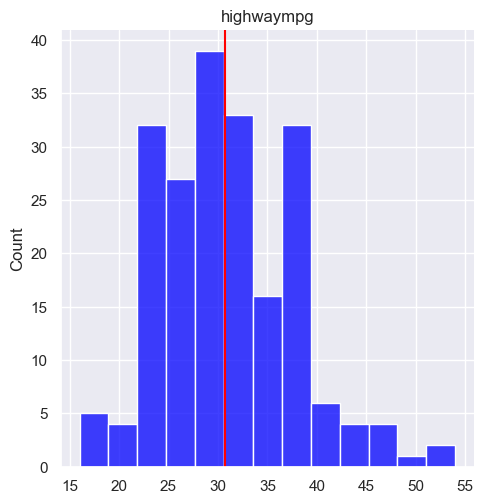

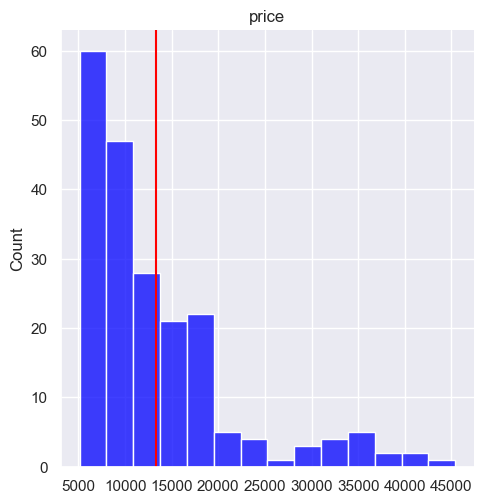

In [21]:
#numerical variables with histogram
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include = numerics).columns

for n in n_variables:
    x = raw_data[n].values
    sns.displot(x, color = 'blue')
    
    mean = raw_data[n].mean()
    
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

The median is  103.0


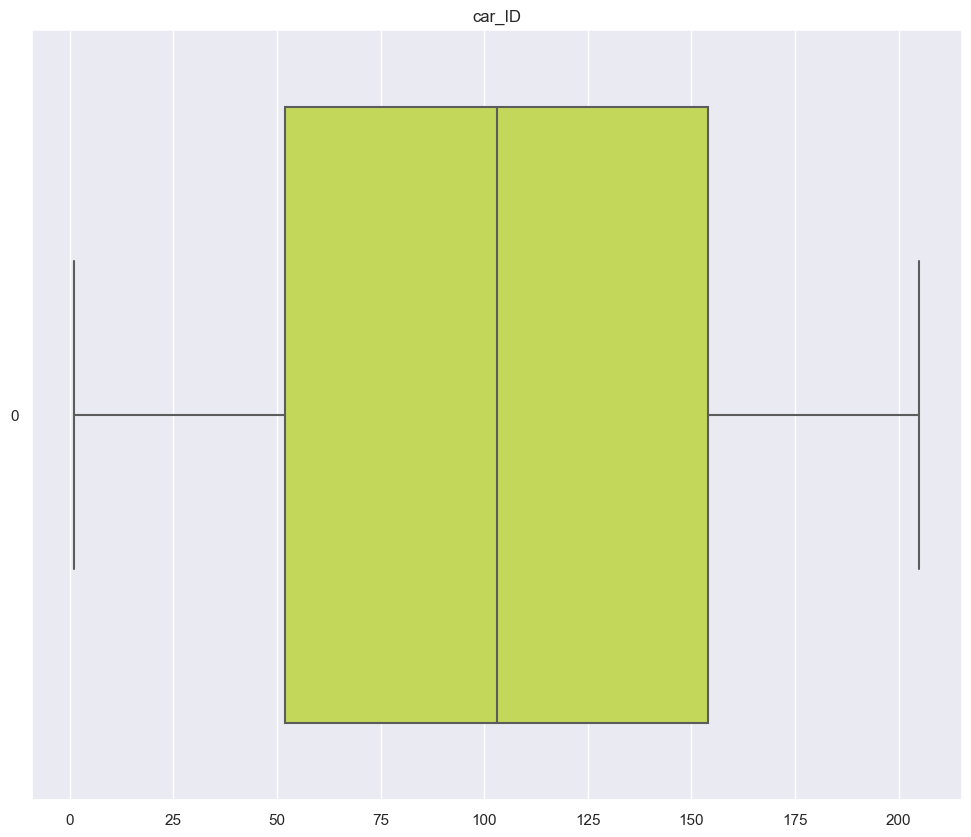

The median is  1.0


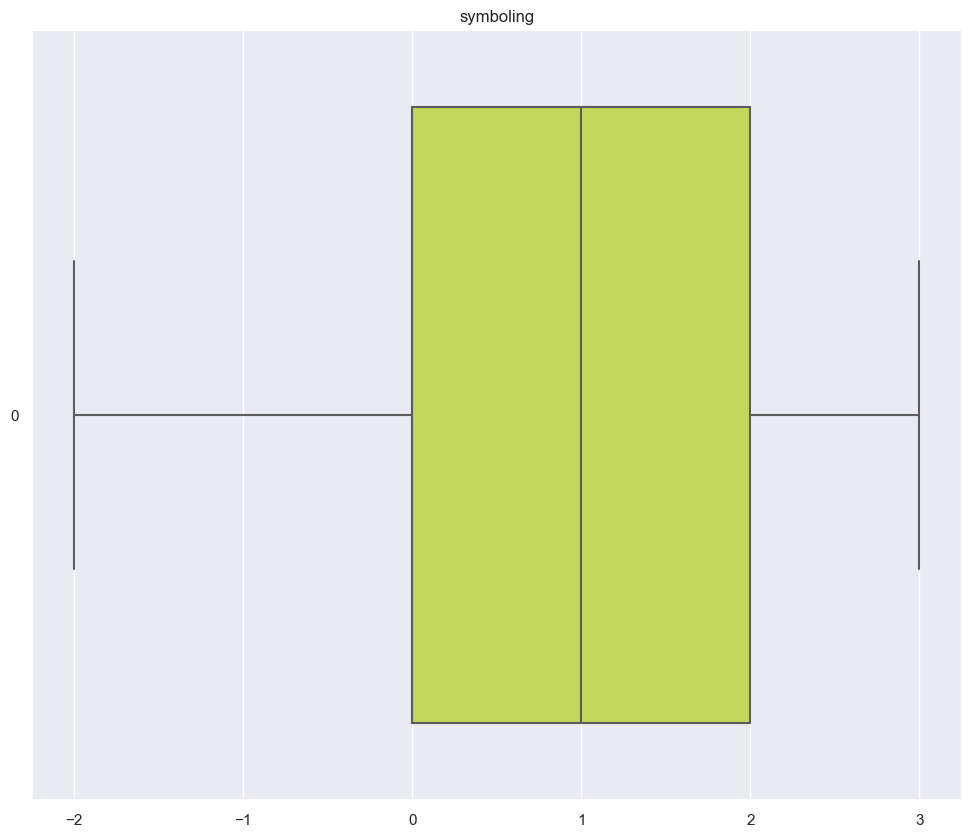

The median is  97.0


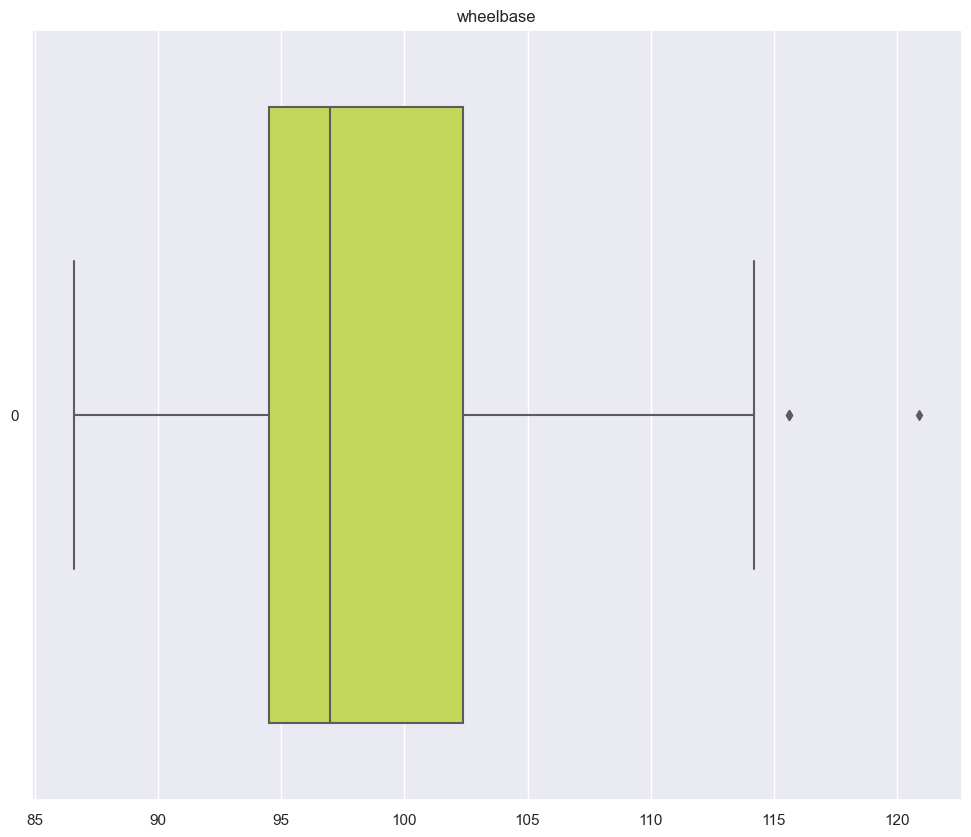

The median is  173.2


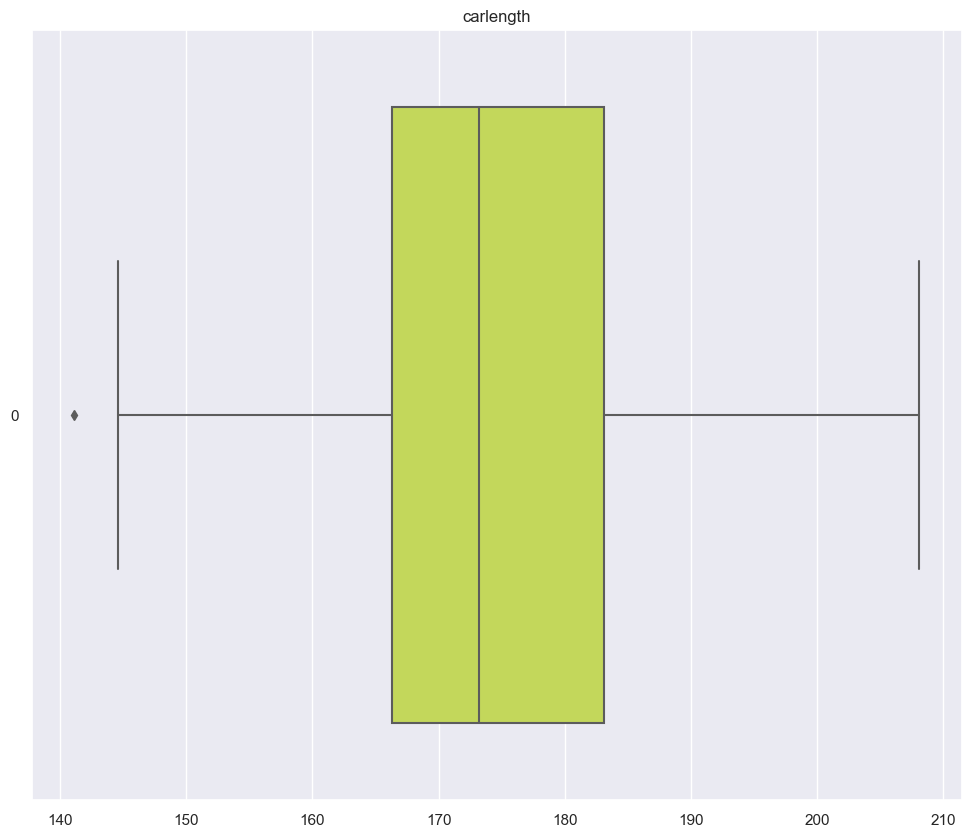

The median is  65.5


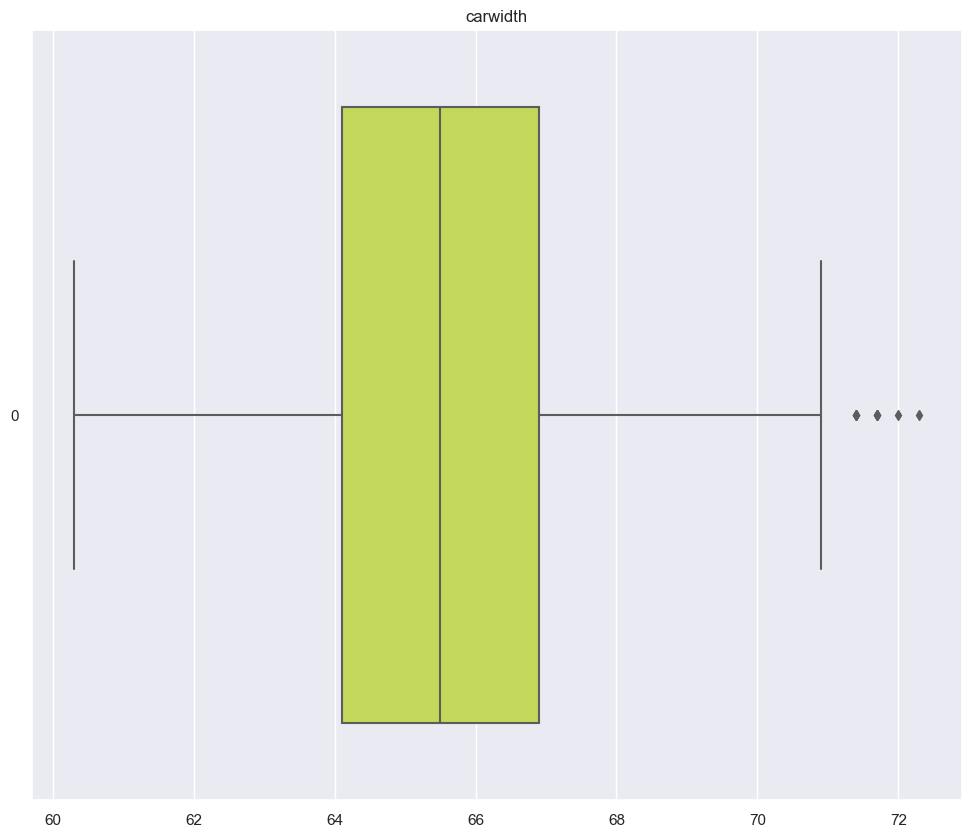

The median is  54.1


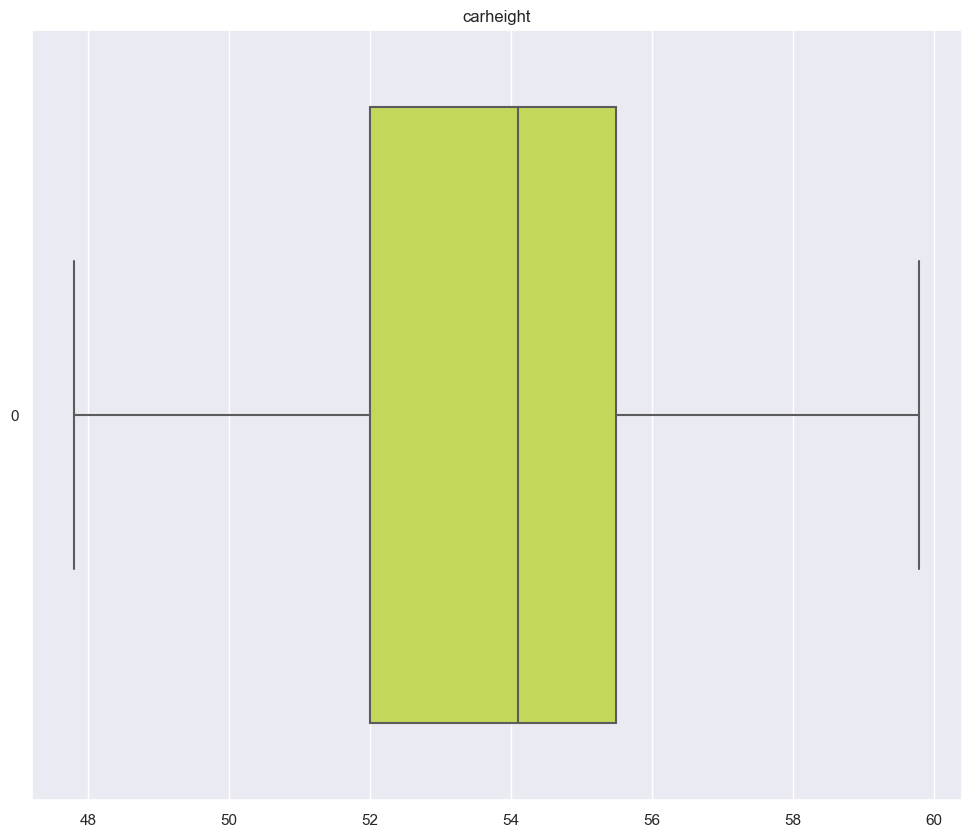

The median is  2414.0


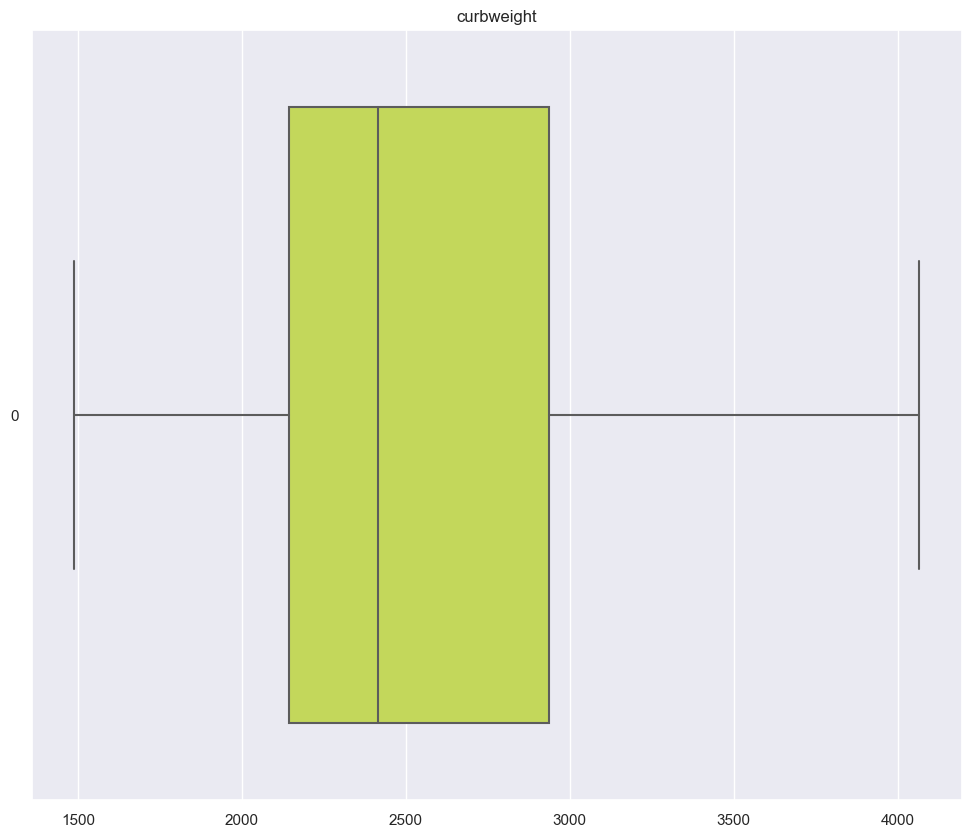

The median is  120.0


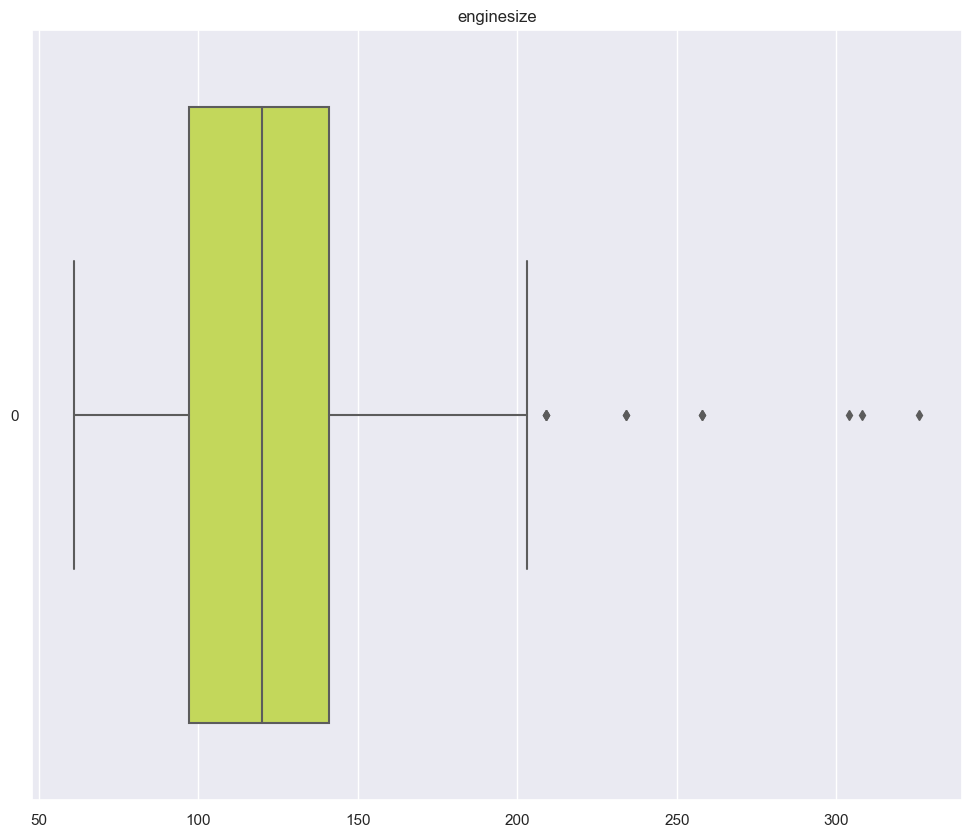

The median is  3.31


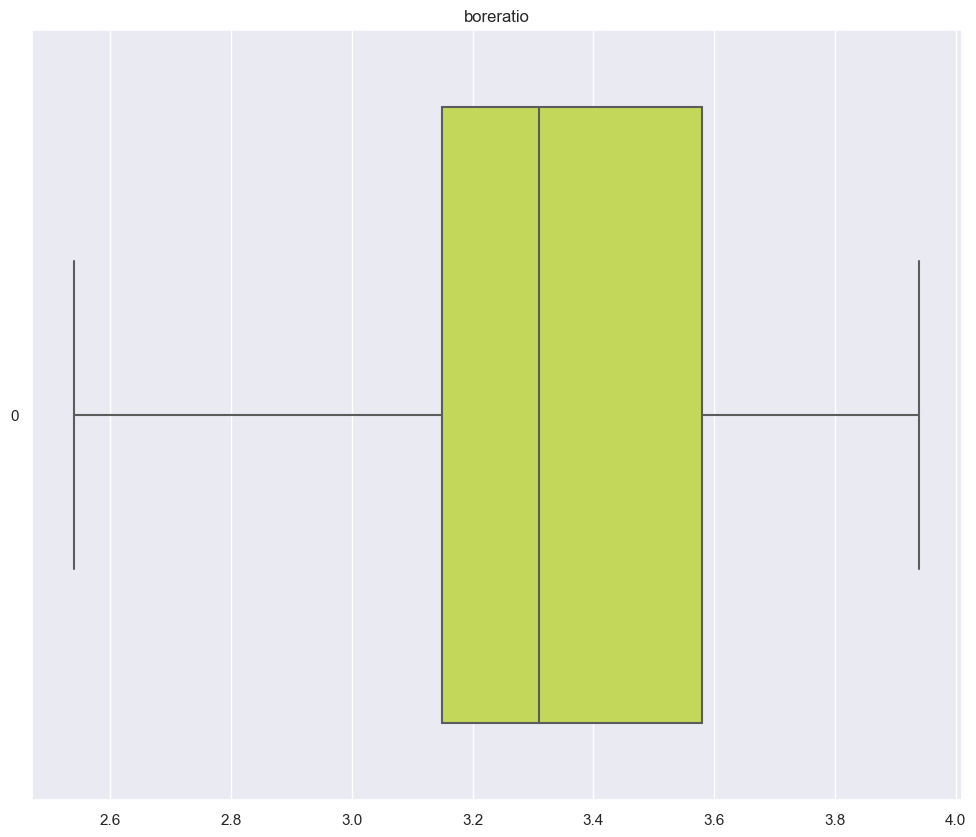

The median is  3.29


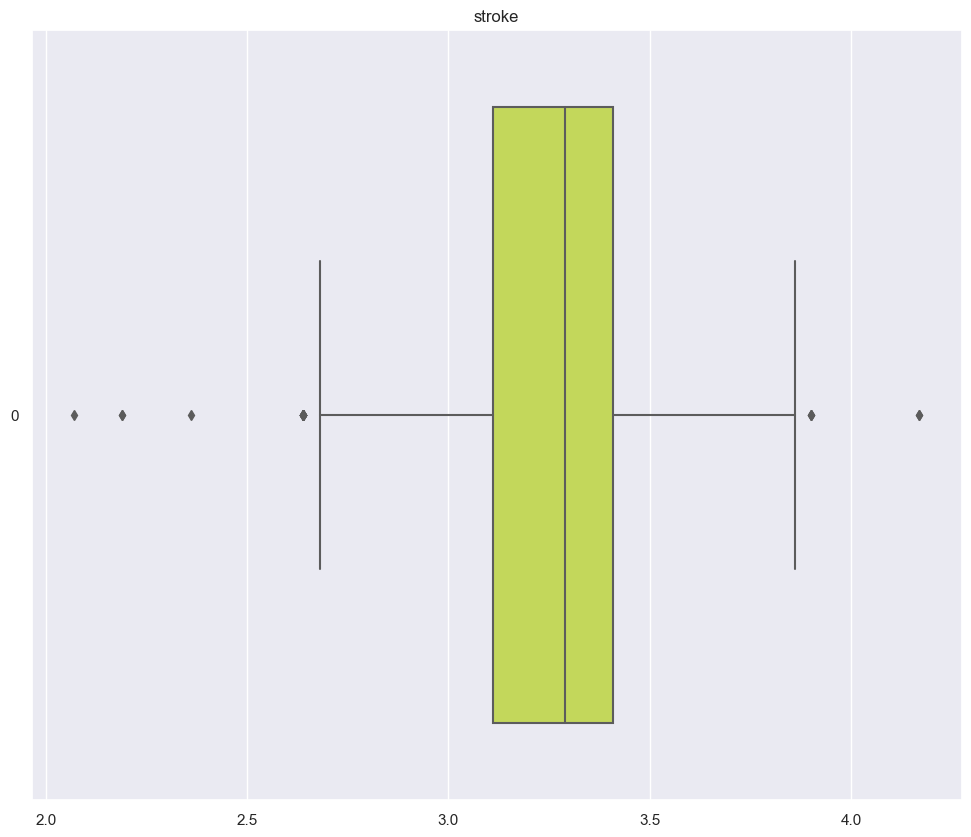

The median is  9.0


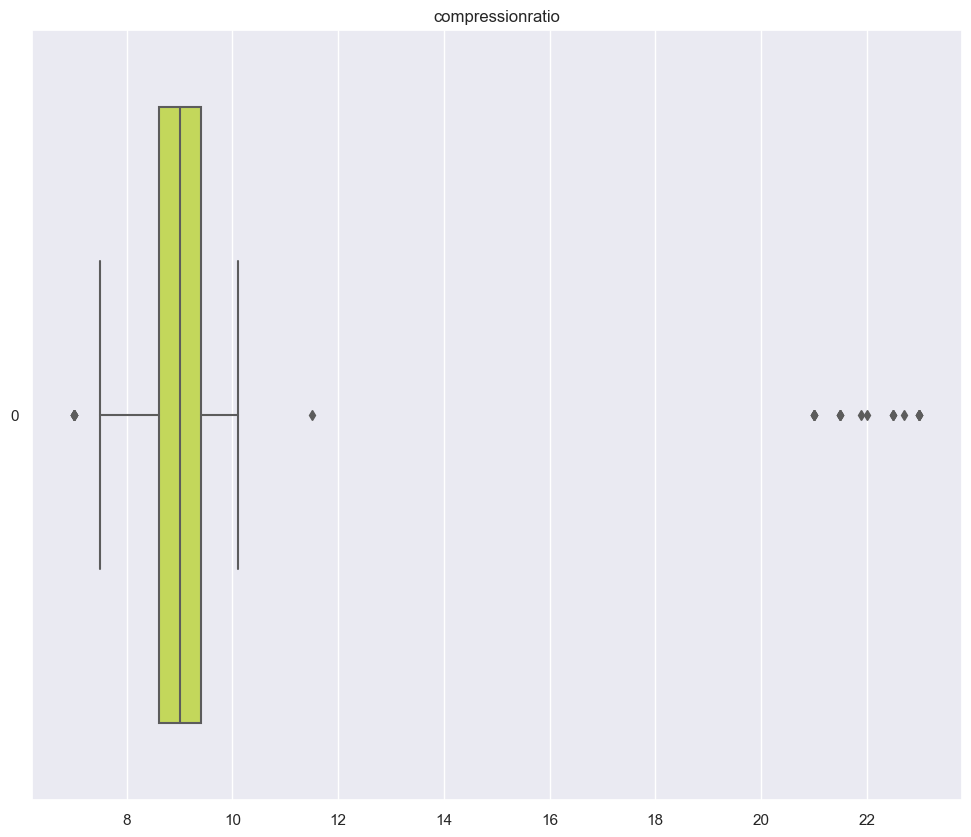

The median is  95.0


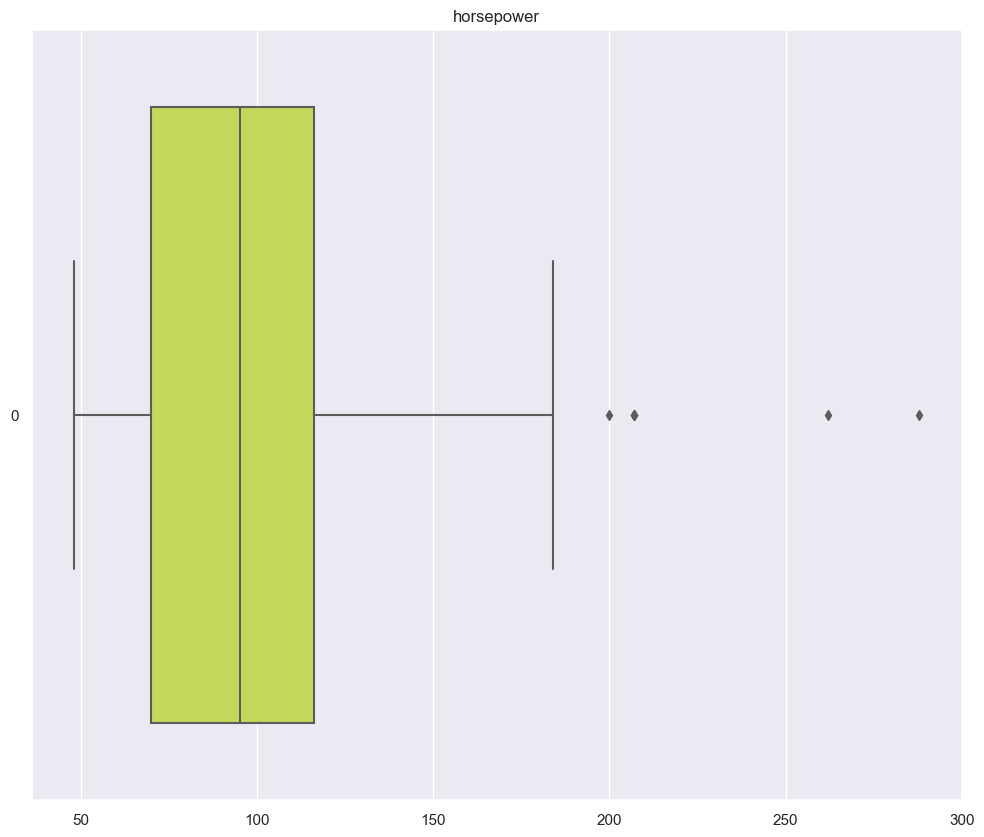

The median is  5200.0


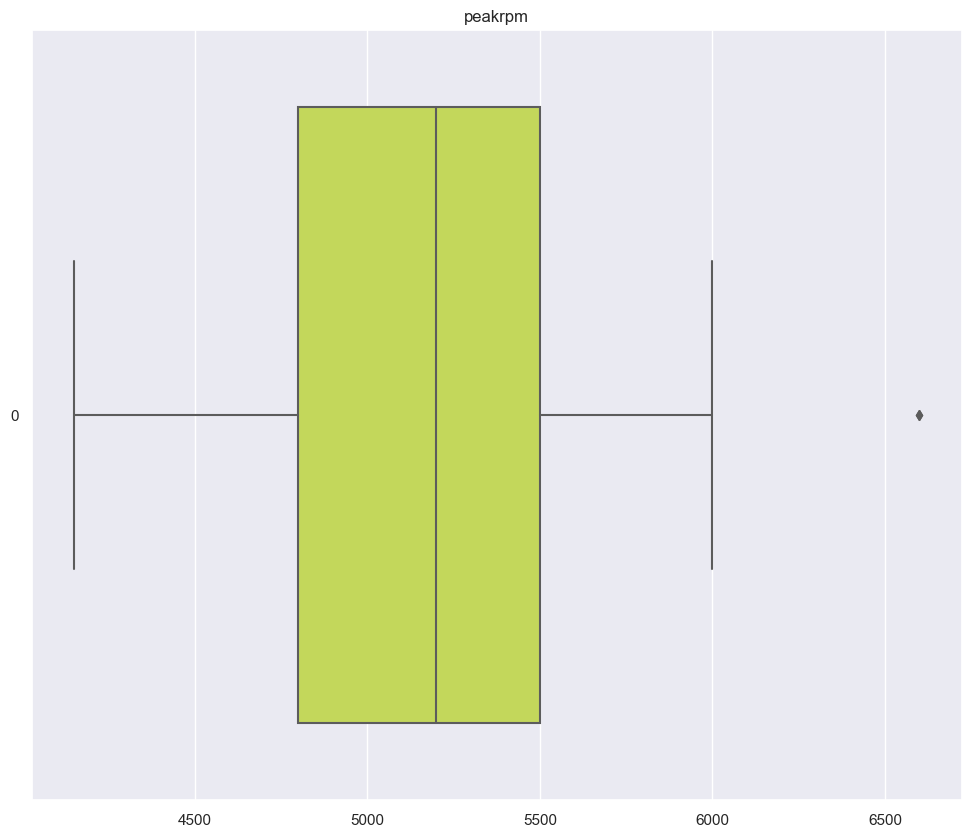

The median is  24.0


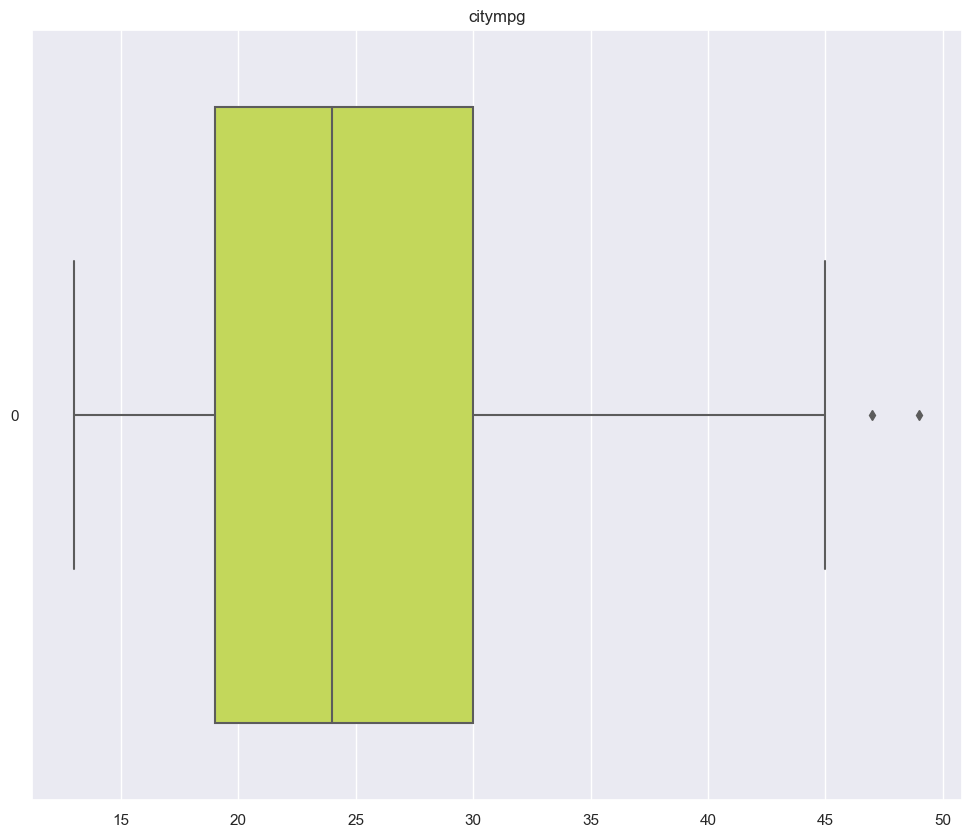

The median is  30.0


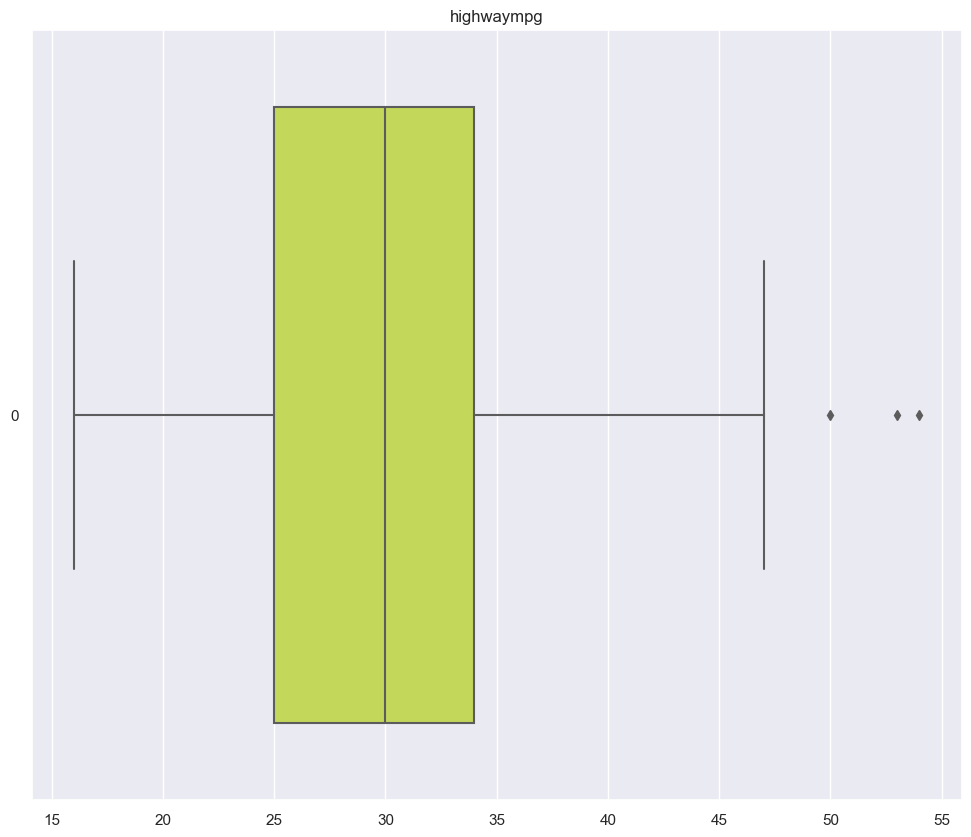

The median is  10295.0


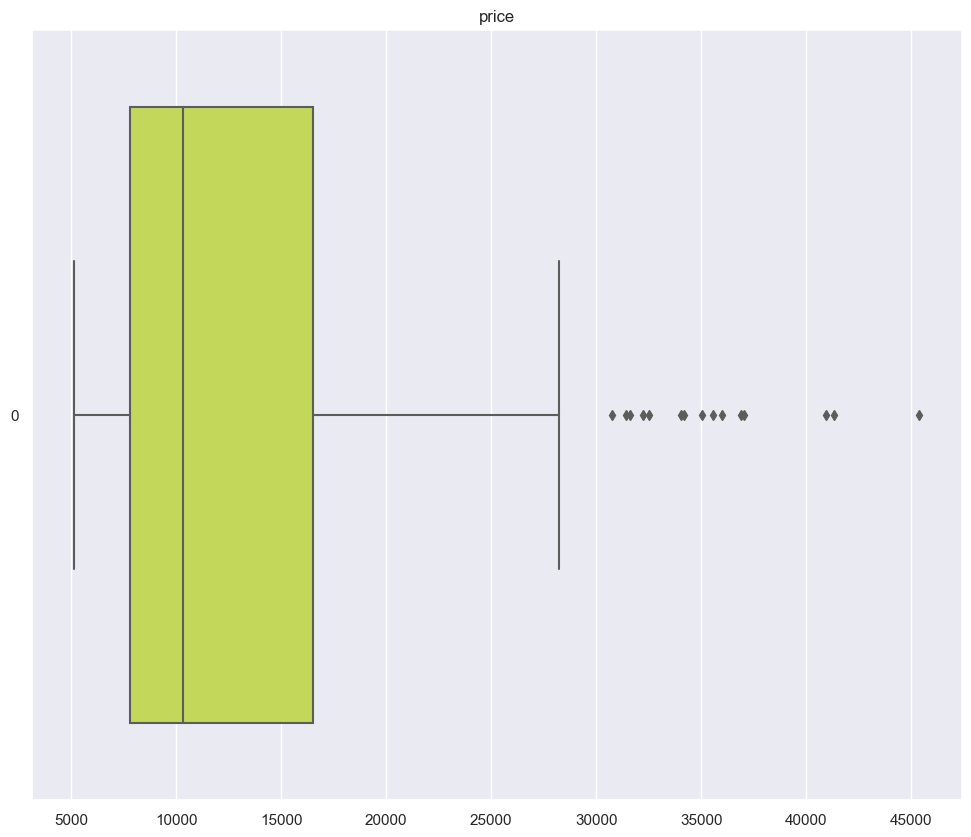

In [22]:
#numerical variables with boxplot
for c in n_variables:
    x = raw_data[c].values
    ax = sns.boxplot(x, orient = 'h', color = '#D1EC46')
    print('The median is ', raw_data[c].median())
    plt.title(c)
    plt.show()

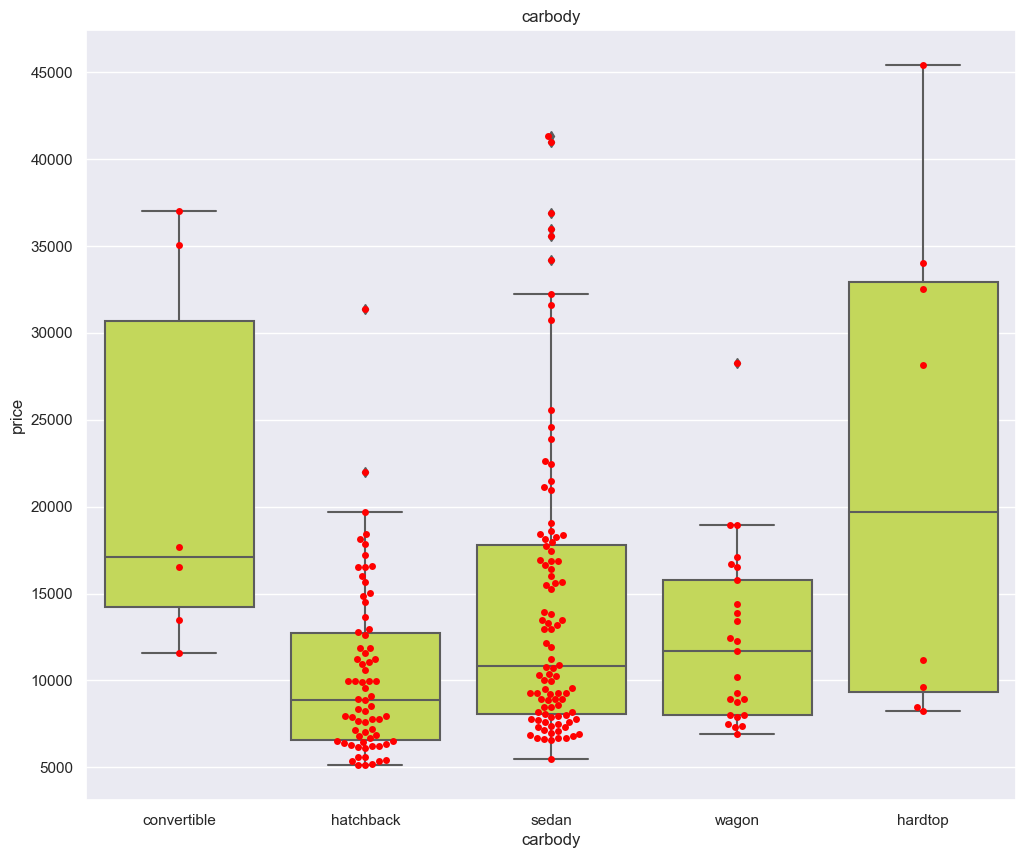

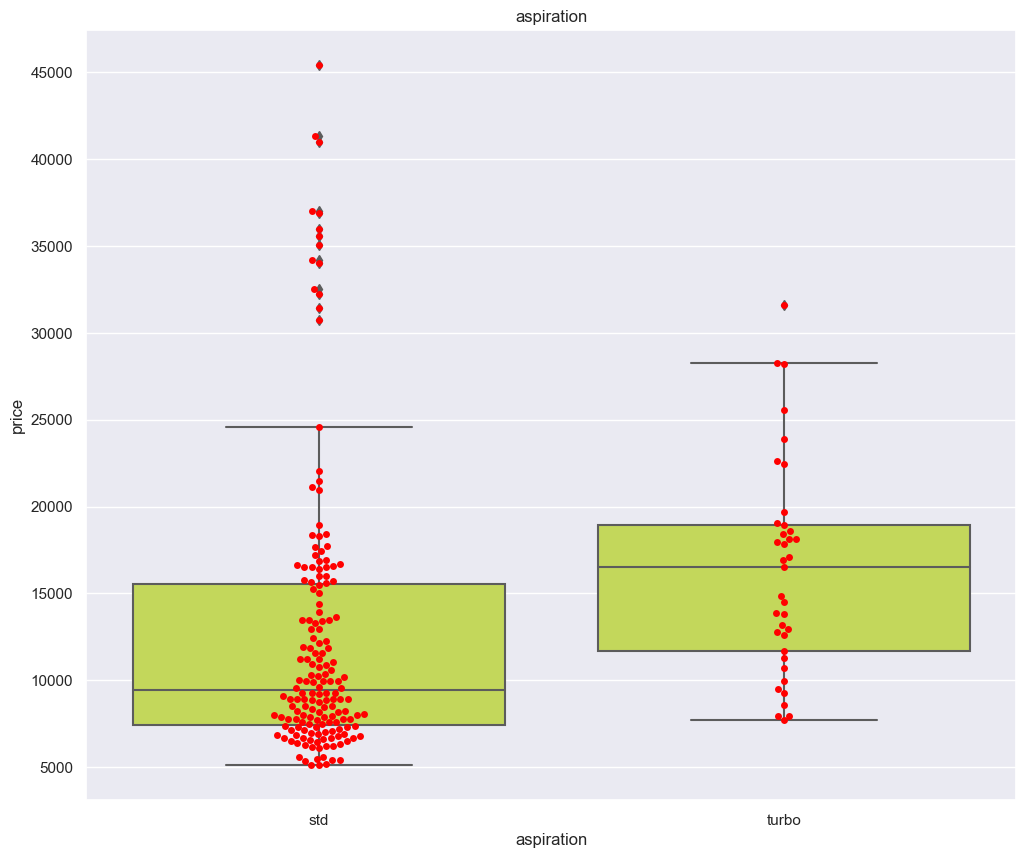

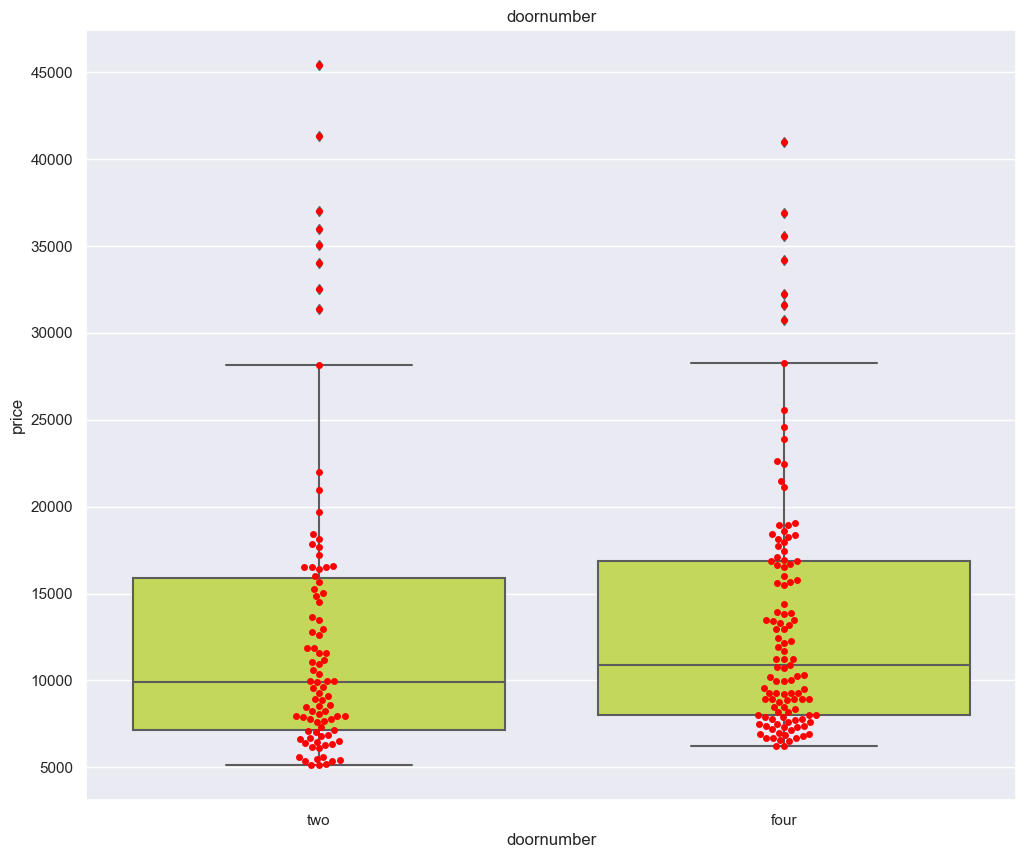

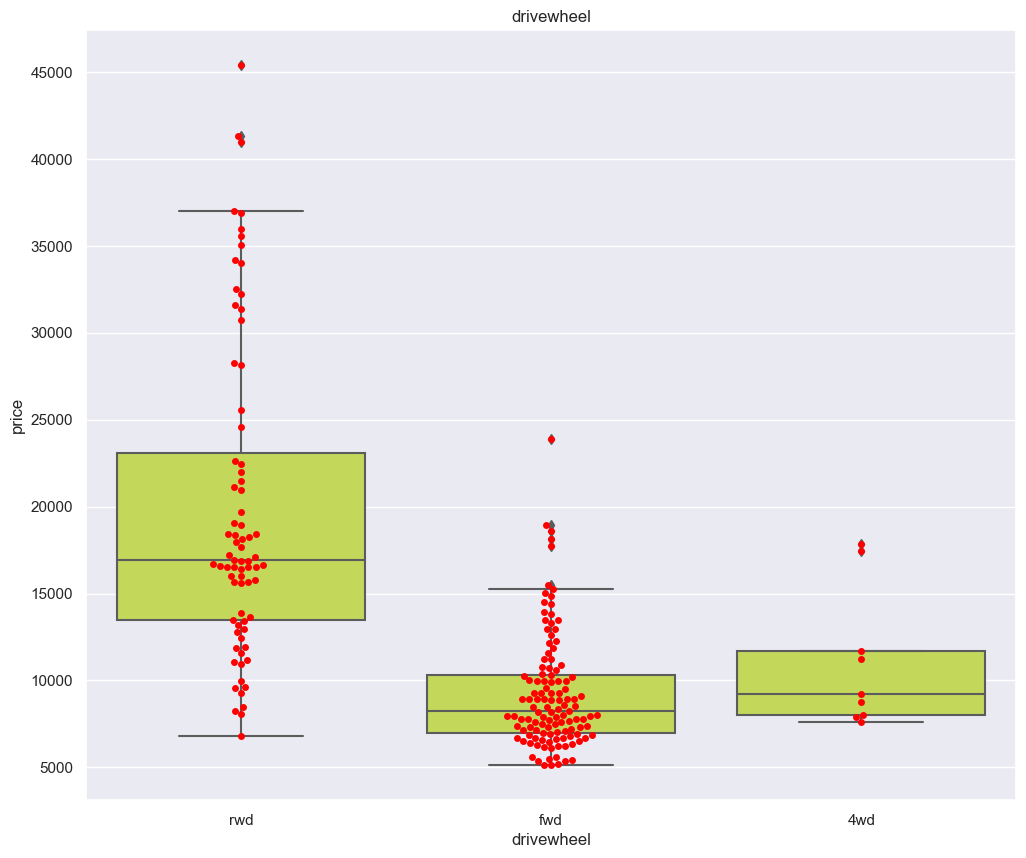

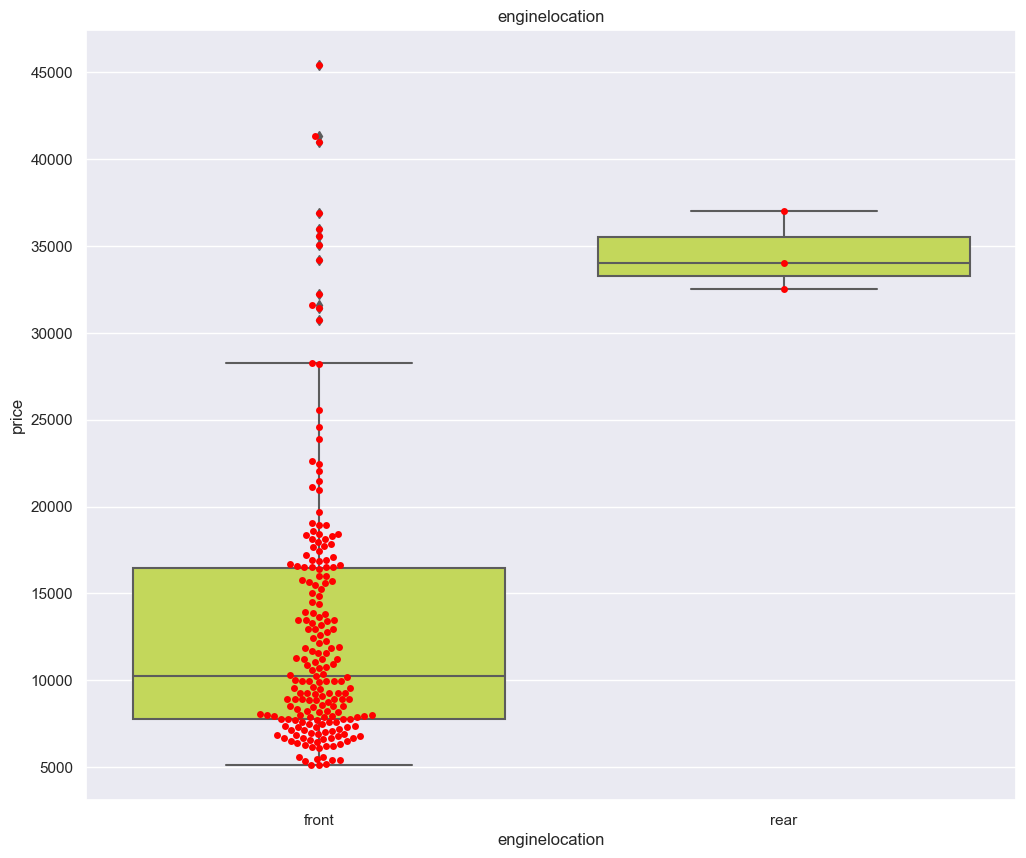

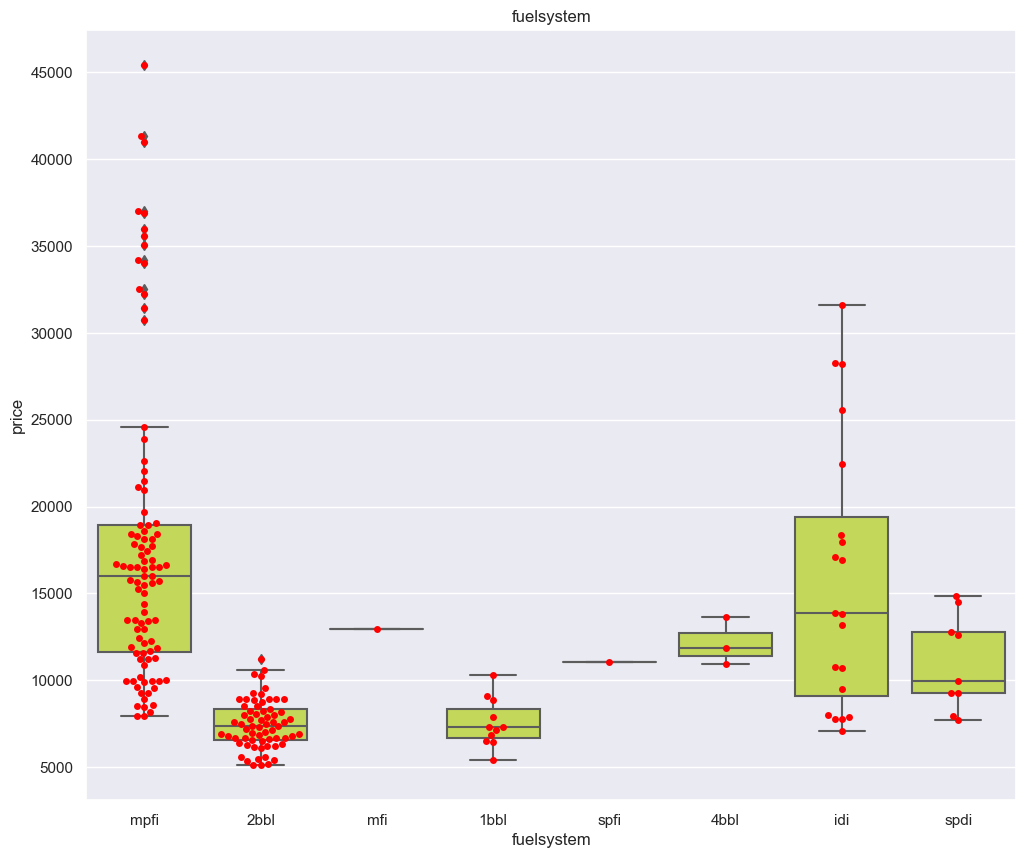

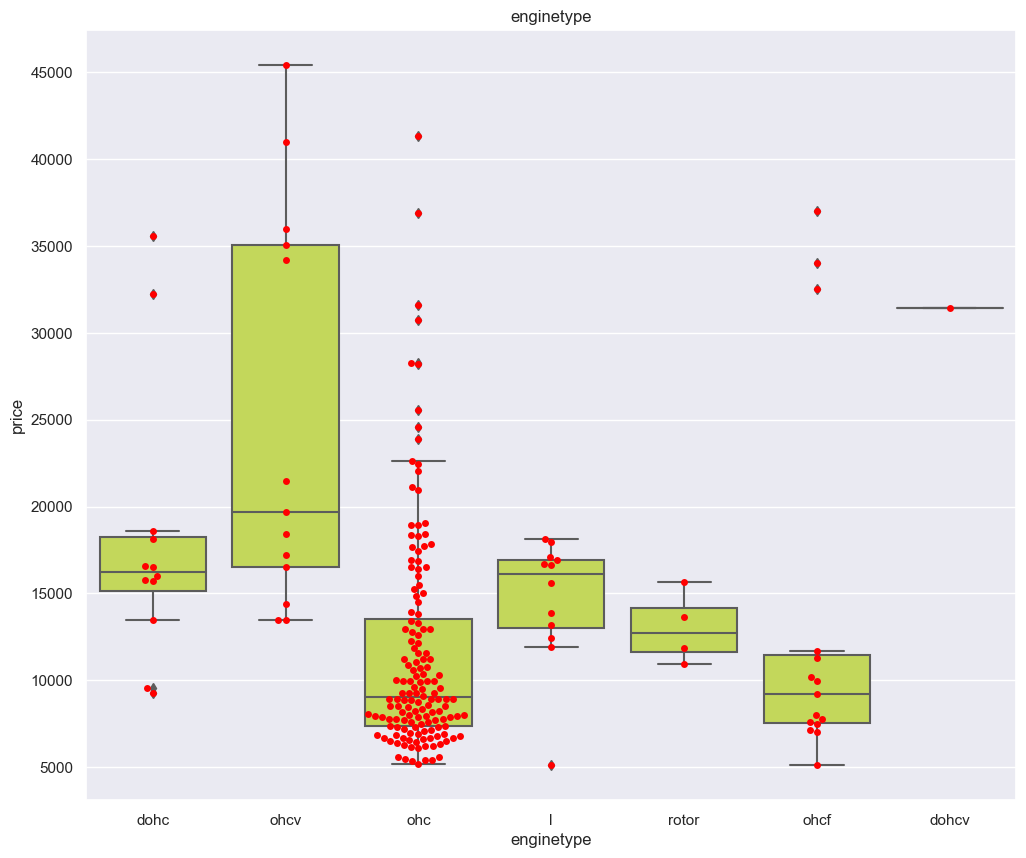

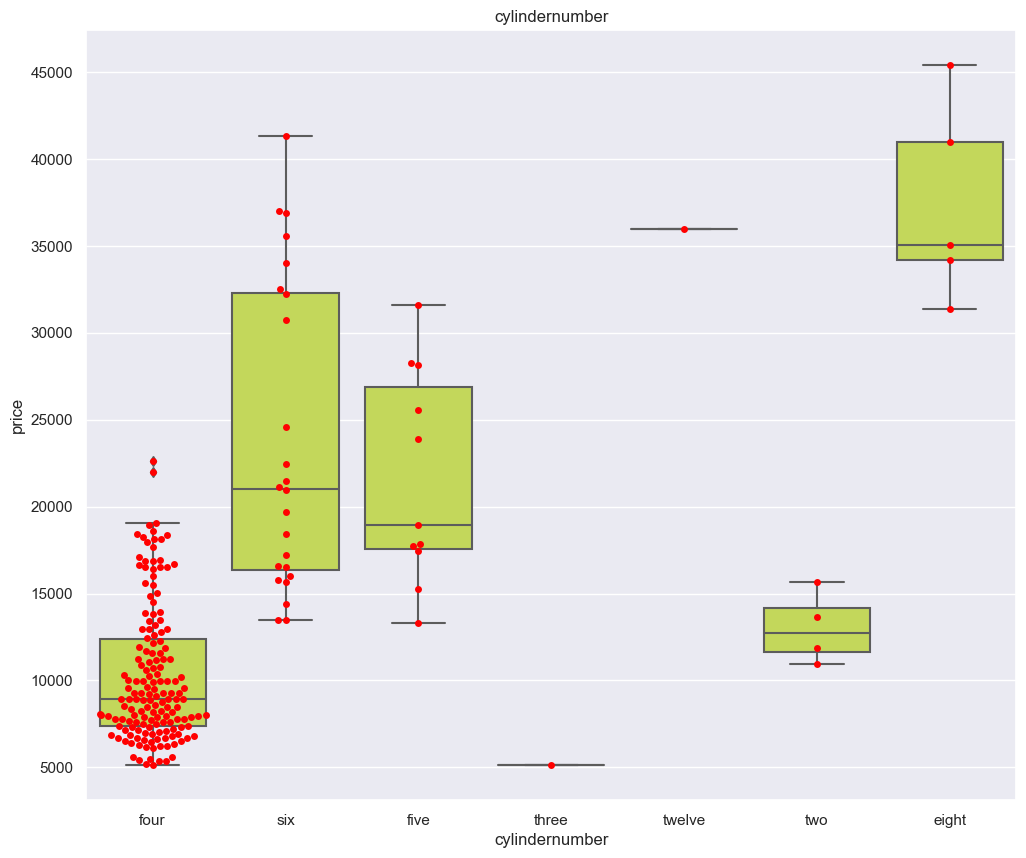

In [23]:
#categorical variables v.s. price
for c in categories:
    ax = sns.boxplot(x = c, y = 'price', data = raw_data, color = '#D1EC46')
    ax = sns.swarmplot(x = c, y = 'price', data = raw_data, color = 'red')
    plt.title(c)
    plt.show()

## 4. Data processing
### 4.1. convert categorical variables to numerical representation

In [24]:
new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])

new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data.dtypes

/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_26761/735787984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_26761/735787984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_26761/735787984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int64
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
carbody_convertible       uint8
carbody_hardtop           uint8
carbody_hatchback         uint8
carbody_sedan             uint8
carbody_wagon             uint8
aspiration_std            uint8
aspiration_turbo          uint8
doornumber_four           uint8
doornumber_two            uint8
drivewheel_4wd            uint8
drivewheel_fwd            uint8
drivewheel_rwd            uint8
enginelocation_front      uint8
enginelo

In [25]:
new_raw_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  \
0      64.1       48.8        2548               4         130       3.47   
1      64.1       48.8        2548               4         130       3.47   
2      65.5       52.4        2823               6         152       2.68   
3      66.2       54.3        2337               4         109       3.19   
4      66.4       54.3        2824               5         136       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68               9.0         111     5000       21          27   
1    2.68               9.0         111     5000       21          27   
2    3.47               9.0         154     5000       19          26   
3    3.40              10.0         102     5500       24          30   
4    3.40               8.0         115     5500       18          22   

     price  carbody_convertible  carbody_hardtop  carbody_hatchback  \
0  13495.0                    1                0                  0   
1  16500.0                    1                0                  0   
2  16500.0                    0                0                  1   
3  13950.0                    0                0                  0   
4  17450.0                    0                0                  0   

   carbody_sedan  carbody_wagon  aspiration_std  aspiration_turbo  \
0              0              0               1                 0   
1              0              0               1                 0   
2              0              0               1                 0   
3              1              0               1                 0   
4              1              0               1                 0   

   doornumber_four  doornumber_two  drivewheel_4wd  drivewheel_fwd  \
0                0               1               0               0   
1                0               1               0               0   
2                0               1               0               0   
3                1               0               0               1   
4                1               0               1               0   

   drivewheel_rwd  enginelocation_front  enginelocation_rear  fuelsystem_1bbl  \
0               1                     1                    0                0   
1               1                     1                    0                0   
2               1                     1                    0                0   
3               0                     1                    0                0   
4               0                     1                    0                0   

   fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                0                0               0               0   
1                0                0               0               0   
2                0                0               0               0   
3                0                0               0               0   
4                0                0               0               0   

   fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginetype_dohc  \
0                1                0                0                1   
1                1                0                0                1   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   enginetype_dohcv  enginetype_l  enginetype_ohc  e

### 4.2. Check important variables by correlation

In [26]:
#using a heatmap to check out the correlation between numerical variables and check which variables are important to price

#drop the column that is not needed
del new_raw_data['car_ID']
del new_raw_data['CarName']

#correlation table
n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

pc

symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   
highwaympg         0.034606  -0.544082  -0.704662 -0.677218  -0.107358   
price             -0.079978   0.577816   0.682920  0.759325   0.119336   

                  curbweight  enginesize  boreratio    stroke  \
symboling          -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase           0.776386    0.569329   0.488750  0.160959   
carlength           0.877728    0.683360   0.606454  0.129533   
carwidth            0.867032    0.735433   0.559150  0.182942   
carheight           0.295572    0.067149   0.171071 -0.055307   
curbweight          1.000000    0.850594   0.648480  0.168790   
enginesize          0.850594    1.000000   0.583774  0.203129   
boreratio           0.648480    0.583774   1.000000 -0.055909   
stroke              0.168790    0.203129  -0.055909  1.000000   
compressionratio    0.151362    0.028971   0.005197  0.186110   
horsepower          0.750739    0.809769   0.573677  0.080940   
peakrpm            -0.266243   -0.244660  -0.254976 -0.067964   
citympg            -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg         -0.797465   -0.677470  -0.587012 -0.043931   
price               0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbweight         -0.797465  0.835305  
enginesize         -0.677470  0.874145  
boreratio          -0.587012  0.553173  
stroke             -0.043931  0.079443  
compressionratio    0.265201  0.067984  
horsepower         -0.770544  0.808139  
peakrpm            -0.054275 -0.085267  
citympg             0.971337 -0.685751  
highwaympg          1.000000 -0.697599  
price              -0.697599  1.000000

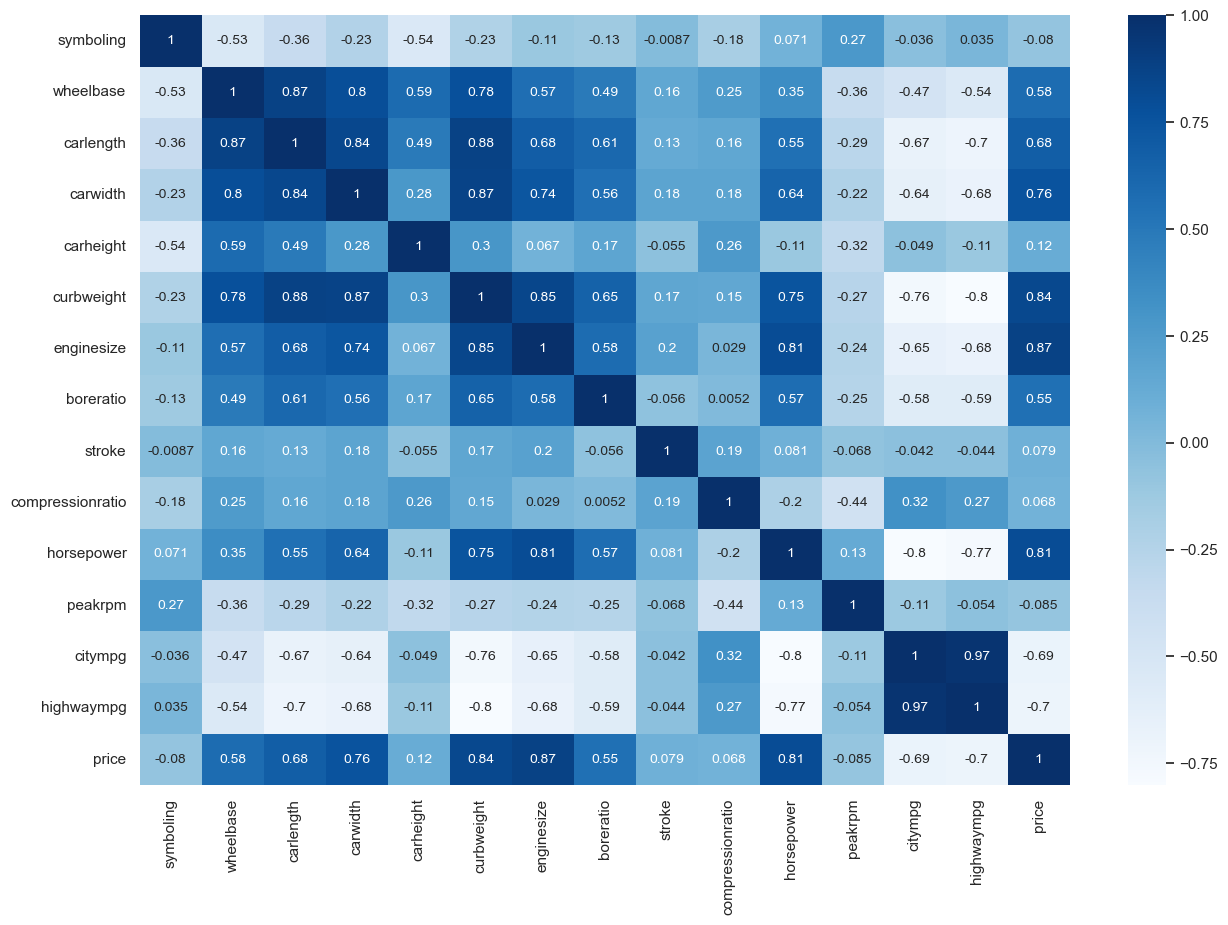

In [27]:
#plot the heatmap
sns.set(rc={'figure.figsize':(15,10)})

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

### 4.3. Feature importance

In [28]:
#check the importance of each variables (score per variable for how much the variable influcences the prediction)
#set x and y
X = new_raw_data.drop(['price'], axis = 1).values
y = new_raw_data['price'].astype(int)
print(X.shape)
print(y.shape)

(205, 46)
(205,)


In [29]:
#tree based estimators, for example decision tree
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [30]:
#check feature importance of each column and make a dataframe
dt.feature_importances_

for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature symboling:, 0.003
Importance of feature wheelbase:, 0.101
Importance of feature carlength:, 0.068
Importance of feature carwidth:, 0.023
Importance of feature carheight:, 0.109
Importance of feature curbweight:, 0.277
Importance of feature cylindernumber:, 0.006
Importance of feature enginesize:, 0.042
Importance of feature boreratio:, 0.050
Importance of feature stroke:, 0.017
Importance of feature compressionratio:, 0.031
Importance of feature horsepower:, 0.097
Importance of feature peakrpm:, 0.028
Importance of feature citympg:, 0.020
Importance of feature highwaympg:, 0.031
Importance of feature carbody_convertible:, 0.000
Importance of feature carbody_hardtop:, 0.003
Importance of feature carbody_hatchback:, 0.010
Importance of feature carbody_sedan:, 0.019
Importance of feature carbody_wagon:, 0.001
Importance of feature aspiration_std:, 0.004
Importance of feature aspiration_turbo:, 0.000
Importance of feature doornumber_four:, 0.006
Importance of feature 

index              Variable  Feature Importance Score
0       5            curbweight                  0.276795
1       4             carheight                  0.108850
2       1             wheelbase                  0.101383
3      11            horsepower                  0.097189
4       2             carlength                  0.067869
5       8             boreratio                  0.050348
6       7            enginesize                  0.041932
7      10      compressionratio                  0.031393
8      14            highwaympg                  0.030768
9      12               peakrpm                  0.028420
10      3              carwidth                  0.023265
11     13               citympg                  0.019693
12     18         carbody_sedan                  0.018708
13      9                stroke                  0.017398
14     40        enginetype_ohc                  0.013401
15     34       fuelsystem_mpfi                  0.011110
16     17     carbody_hatchback                  0.010162
17     30       fuelsystem_2bbl                  0.009173
18     23        doornumber_two                  0.006323
19      6        cylindernumber                  0.006323
20     25        drivewheel_fwd                  0.005736
21     22       doornumber_four                  0.005736
22     20        aspiration_std                  0.004426
23     45          fueltype_gas                  0.003931
24     16       carbody_hardtop                  0.003115
25      0             symboling                  0.002621
26     26        drivewheel_rwd                  0.001310
27     44       fueltype_diesel                  0.001310
28     19         carbody_wagon                  0.001310
29     37       enginetype_dohc                  0.000000
30     43      enginetype_rotor                  0.000000
31     42       enginetype_ohcv                  0.000000
32     41       enginetype_ohcf                  0.000000
33     15   carbody_convertible                  0.000000
34     39          enginetype_l                  0.000000
35     38      enginetype_dohcv                  0.000000
36     24        drivewheel_4wd                  0.000000
37     36       fuelsystem_spfi                  0.000000
38     21      aspiration_turbo                  0.000000
39     33        fuelsystem_mfi                  0.000000
40     32        fuelsystem_idi                  0.000000
41     31       fuelsystem_4bbl                  0.000000
42     29       fuelsystem_1bbl                  0.000000
43     28   enginelocation_rear                  0.000000
44     27  enginelocation_front                  0.000000
45     35       fuelsystem_spdi                  0.000000

### 4.4. Splitting the data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 46)
(41, 46)
(164,)
(41,)


## 5. Run linear regression model
### 5.1. Define, fit, predict

In [32]:
#define the model
lm = LinearRegression(fit_intercept = True)

#fit the model
lm.fit(X_train, y_train)

#predict
y_pred = lm.predict(X_train)

In [33]:
#predicted data
y_pred

array([39729.983651, 10329.759047, 6467.729893, 12137.120023, 8836.951633,
       10741.304562, 8049.384718, 15645.000000, 7345.361905, 15824.854261,
       16587.803039, 20250.497140, 31471.853530, 6950.314459, 9528.399161,
       19346.841897, 16918.812127, 10885.124938, 12160.759954,
       6874.474606, 7741.246774, 19646.576357, 5614.202915, 16858.492818,
       8239.926288, 10443.441425, 16621.833124, 13978.002621,
       34369.146949, 12585.967794, 10254.641177, 9894.380184,
       15517.180324, 18346.655784, 27458.994956, 15070.416202,
       6355.661890, 12882.657642, 10449.731029, 19471.084693,
       10180.432931, 7238.398763, 10922.919684, 12572.094910, 6834.122588,
       9894.380184, 7652.619311, 8513.240933, 11882.244120, 13772.798474,
       21955.619565, 10709.210474, 7312.307588, 18492.651838, 4417.271468,
       7098.218352, 8383.710463, 10009.837428, 4408.269764, 9504.221710,
       16155.601759, 9580.929894, 14662.811656, 27423.062054,
       13142.696888, 6349.3192

### 5.2. Validate

In [39]:
#model accuracy or R2 on train data
print('The accuracy on the train data is: ', lm.score(X_train, y_train))
print('The accuracy on the train data y and predeicted y is: ', r2_score(y_train, y_pred))
#model accuracy on test data
print('The accuracy on test data is: ', lm.score(X_test, y_test))

#RMSE of train data
print('The RMSE on train data is: ', sqrt(mean_squared_error(y_train, y_pred)))
#RMSE of test data
print('The RMSE on test data is: ', sqrt(mean_squared_error(y_test, lm.predict(X_test))))

#MAE of train data
print('The MAE on train data is: ', mean_absolute_error(y_train, y_pred))
#MAE of test data
print('The MAE on test data is: ', mean_absolute_error(y_test, lm.predict(X_test)))

#coefficients
print('Coefficients: ', lm.coef_)

#The intercept
print('Intercept: ', lm.intercept_)

The accuracy on the train data is:  0.9318255662222911
The accuracy on the train data y and predeicted y is:  0.9318255662222911
The accuracy on test data is:  0.8247350935154855
The RMSE on train data is:  2055.1996023307565
The RMSE on test data is:  3495.5687090722927
The MAE on train data is:  1502.1342445913708
The MAE on test data is:  2418.259819648058
Coefficients:  [375.223403 49.980585 -39.598371 583.472001 231.003268 4.727986
 -1719.351425 202.278843 -9761.603504 -6363.456916 -1216.264785 17.534555
 2.980697 -20.605172 171.139044 3157.357052 -2275.384940 -37.689427
 369.534191 -1213.816876 -492.821176 492.821176 124.412268 -124.412268
 -676.682688 -751.176719 1427.859408 -3653.529908 3653.529908 -667.939974
 689.659364 226.247529 5729.711799 -3072.010748 527.200669 -2775.442830
 -657.425810 -2789.433258 3283.250551 -2975.335571 1267.351716 1747.692867
 -6929.471245 6395.944940 5729.711799 -5729.711799]
Intercept:  -15425.758718582176


##### The model explains 93% of the train data & 82% of the test data.

### 5.3. Improve model by parameter tuning

#### 5.3.1. Use only the variables with the top 10 feature importance

In [44]:
#try running the model with only the variables with the top 10 feature importance score
#check the top 10 in feature importance table
final_fi['Variable'][0:10].values

array(['curbweight', 'carheight', 'wheelbase', 'horsepower', 'carlength',
       'boreratio', 'enginesize', 'compressionratio', 'highwaympg',
       'peakrpm'], dtype=object)

In [49]:
# subset the data with only the above variables and price
test1 = final_fi['Variable'][0:10].values

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# split the data but with only the above variables
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, test_size = 0.2, random_state = 15)

print(X.shape)
print(y.shape)

# define the model
lm2 = LinearRegression(fit_intercept = True)

# fit the model
lm2.fit(X_train, y_train)

# predict
y_pred = lm2.predict(X_train)

# Validate
print('The Accuracy on test data is: ', lm2.score(X_test, y_test))
print('The RMSE on test data is: ', sqrt(mean_squared_error(y_test, lm2.predict(X_test))))
print('The MAE on test data is: ', mean_absolute_error(y_test, lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy on test data is:  0.8886586460418311
The RMSE on test data is:  2786.112247787885
The MAE on test data is:  2045.0313297332898


##### results improved.

#### 5.3.2. Use variables that went through recursive feature elimination

In [71]:
# recursive linear feature elimination
from sklearn.feature_selection import RFE

selector = RFE(lm, n_features_to_select = 10, step = 1)
selector = selector.fit(X,y)
selector.support_

#subset the data
X_columns = new_raw_data.drop(['price'], axis = 1)
X_columns

print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]


Chosen best 10 feature by rfe: Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


In [72]:
#split the data
test1 = rfe_lr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# split the data but with only the above variables
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, test_size = 0.2, random_state = 15)

print(X.shape)
print(y.shape)

# define the model
lm2 = LinearRegression(fit_intercept = True)

# fit the model
lm2.fit(X_train, y_train)

# predict
y_pred = lm2.predict(X_train)

# Validate
print('The Accuracy on test data is: ', lm2.score(X_test, y_test))
print('The RMSE on test data is: ', sqrt(mean_squared_error(y_test, lm2.predict(X_test))))
print('The MAE on test data is: ', mean_absolute_error(y_test, lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy on test data is:  0.8226144299201712
The RMSE on test data is:  3516.6528965468387
The MAE on test data is:  2410.4047460752377


##### worse results.

#### 5.3.3. Use variables that went through recursive feature elimination with support vector regressor

In [73]:
# feature elimination
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selector.support_
print('Chosen best 10 feature by rfe:',X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe: Index(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'compressionratio',
       'horsepower', 'citympg', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [74]:
#split the data
test1 = rfe_svr

X2 = new_raw_data[test1].values
y2 = new_raw_data['price'].astype(int)

# split the data but with only the above variables
X_train, X_test, y_train, y_test = train_test_split(X2, y2, train_size = 0.8, test_size = 0.2, random_state = 15)

print(X.shape)
print(y.shape)

# define the model
lm2 = LinearRegression(fit_intercept = True)

# fit the model
lm2.fit(X_train, y_train)

# predict
y_pred = lm2.predict(X_train)

# Validate
print('The Accuracy on test data is: ', lm2.score(X_test, y_test))
print('The RMSE on test data is: ', sqrt(mean_squared_error(y_test, lm2.predict(X_test))))
print('The MAE on test data is: ', mean_absolute_error(y_test, lm2.predict(X_test)))

(205, 46)
(205,)
The Accuracy on test data is:  0.8933071005120906
The RMSE on test data is:  2727.3326973721287
The MAE on test data is:  2087.236816959344


##### slightly better results.

### 5.4. Improve results by trying other model
#### 5.4.1. Radom forest model

In [76]:
from sklearn.ensemble import RandomForestRegressor

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 15)

#define model
regr = RandomForestRegressor(max_depth=2, random_state=0)

#fit model
regr.fit(X_train, y_train)

#predict
y_pred = regr.predict(X_train)

#Validate
print('The Accuracy on test data: ', regr.score(X_test, y_test))
print('The RMSE on test data: ', sqrt(mean_squared_error(y_test, regr.predict(X_test))))
print('The Mae on test data is: ', mean_absolute_error(y_test, regr.predict(X_test)))

The Accuracy on test data:  0.8780755290763865
The RMSE on test data:  2915.518491028241
The Mae on test data is:  2129.754296476598


##### not better.

In [85]:
#hyperparameter tuning for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr, param_grid = param_grid, cv = 3, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] E

/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/joblib/externals/loky/backend/resource_tracker.py:120: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some folders/sempahores might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/joblib/externals/loky/backend/synchronize.py", line 103, in _cleanup
    resource_tracker.unregister(name, "semlock")
  File "/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 196, in unregister
    self._send('UNREGISTER', name, rtype)
  File "/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/joblib/exte

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

GridSearchCV(cv=3, estimator=RandomForestRegressor(max_depth=2, random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [86]:
#check the best grid
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, random_state=0)

In [87]:
#define
regr = best_grid

#fit
regr.fit(X_train, y_train)

#predict
y_pred = regr.predict(X_train)

#validate
print('The Accuracy on test data is: ', regr.score(X_test, y_test))
print('The RMSE on test data is: ', sqrt(mean_squared_error(y_test, regr.predict(X_test))))
print('The MAE on test data is: ', mean_absolute_error(y_test, regr.predict(X_test)))


The Accuracy on test data is:  0.8786155326699926
The RMSE on test data is:  2909.0549092477513
The MAE on test data is:  1641.6239400250126


##### some better some not.

#### 5.4.2. XG Boost 

In [88]:
from sklearn.ensemble import GradientBoostingRegressor 

#define
reg = GradientBoostingRegressor(random_state = 0)

#fit
reg.fit(X_train, y_train)

#Validate
print('The Accuracy on test data is: ', reg.score(X_test, y_test))
print('The RMSE on test data is: ', sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print('The MAE on test data is: ', mean_absolute_error(y_test, reg.predict(X_test)))

The Accuracy on test data is:  0.943045908453219
The RMSE on test data is:  1992.6582648025094
The MAE on test data is:  1365.0997453982443


##### improved.

In [93]:
#XGBoost hyperparametertuning
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}


In [96]:
#define
xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.01, max_depth=6, n_estimators=1000)

#fit
xgbr.fit(X_train, y_train)

#predict
y_pred = xgbr.predict(X_train)

# validate
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.9433440606895322
The RMSE  on the testing dataset is:  1987.435680384731
The MAE  on the testing dataset is:  1267.2297899199696


##### improved 

#### 5.4.3. Neural network regressor - MLPRegressor

In [97]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_train)
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.5776609379451173
The RMSE  on the testing dataset is:  5426.264831267777
The MAE  on the testing dataset is:  3579.124864131363


/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


##### bad results

In [99]:
#MLPR Optimization
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

regr = MLPRegressor(random_state=1, max_iter=500)

clf = GridSearchCV(regr, parameter_space, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
 

Best parameters: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
#define
regr = MLPRegressor(random_state=1, max_iter=500, activation='relu', alpha= 0.05, hidden_layer_sizes= (10, 30, 10), learning_rate= 'constant', solver= 'adam')

#fit
regr.fit(X_train, y_train)

#predict
y_pred = regr.predict(X_train)


#validate
print('The Accuracy  on the testing dataset is: ', regr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy  on the testing dataset is:  0.1850562255360102
The RMSE  on the testing dataset is:  7537.619033499178
The MAE  on the testing dataset is:  5465.367204600929


/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


##### even worse. There is not enough data for neural network

### 5.5. Update the model using the best method

In [103]:
# in cnclusion, the best method is XGBoost with hyperparameter tuning
# rerun again
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

X = new_raw_data.drop(['price'], axis = 1).values
y = new_raw_data['price'].astype(int)
print(X.shape)
print(y.shape)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#hyperparameter tuning
params = { 'max_depth': [3,6,9,12],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

#define
xgbr = xgb.XGBRegressor(seed = 20, colsample_bytree = 0.7, learning_rate= 0.01, max_depth=6, n_estimators=1000)

#fit
xgbr.fit(X_train, y_train)

#predict
y_pred = xgbr.predict(X_train)

# validate
print('The Accuracy  on the testing dataset is: ', xgbr.score(X_test, y_test) )
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,xgbr.predict(X_test)))

(205, 46)
(205,)
(164, 46)
(41, 46)
(164,)
(41,)
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}
The Accuracy  on the testing dataset is:  0.9433440606895322
The RMSE  on the testing dataset is:  1987.435680384731
The MAE  on the testing dataset is:  1267.2297899199696
